In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rc('font', size=18)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=16)   # fontsize of the figure title

df_ranking=pd.read_csv('worldometer_data.csv')

# Filter null data
filter = ((pd.notnull(df_ranking['WHO Region'])) &
         (pd.notnull(df_ranking['Country/Region'])) &
         (pd.notnull(df_ranking['TotalCases'])) &
         (pd.notnull(df_ranking['TotalDeaths'])) &
         (pd.notnull(df_ranking['TotalRecovered'])) &
         (pd.notnull(df_ranking['Tests/1M pop'])))
df_ranking = df_ranking[filter]

# Extract the ten countries with high case rate and death rate
df_ranking = df_ranking.nlargest(10, ['Tot Cases/1M pop', 'Deaths/1M pop']).reset_index()

# Remove useless columns
df_ranking = df_ranking.drop(['index', 'NewCases', 'NewDeaths', 'NewRecovered', 'Serious,Critical', 'TotalTests', 'Tests/1M pop'], axis=1)

# Setting the new index
df_ranking.index = np.arange(1, len(df_ranking) + 1)

df=pd.read_csv('covid_19_clean_complete.csv')

# Filter null data
filter = ((pd.notnull(df['WHO Region'])) &
         (pd.notnull(df['Confirmed'])) &
         (pd.notnull(df['Deaths'])) &
         (pd.notnull(df['Recovered'])) &
         (pd.notnull(df['Country/Region'])) &
         (df['Confirmed'] > 0))
df = df[filter]
ranking_cases = df

# Filter by date
filter = ranking_cases['Date'] == '2020-07-27'
aux = ranking_cases[filter]
global_sum = aux.sum(axis=0)

global_cases = global_sum['Confirmed']
global_deaths = global_sum['Deaths']
global_recovered = global_sum['Recovered']

# Date format
ranking_cases['Date'] = ranking_cases['Date'].astype('datetime64').dt.strftime("%m-%d")

In [33]:
df_ranking

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,WHO Region
1,Qatar,Asia,2807805.0,112092,178.0,108831.0,3083.0,39922.0,63.0,EasternMediterranean
2,Bahrain,Asia,1706669.0,42889,156.0,39945.0,2788.0,25130.0,91.0,EasternMediterranean
3,San Marino,Europe,33938.0,699,42.0,657.0,0.0,20596.0,1238.0,Europe
4,Chile,South America,19132514.0,366671,9889.0,340168.0,16614.0,19165.0,517.0,Americas
5,Panama,North America,4321282.0,71418,1574.0,45658.0,24186.0,16527.0,364.0,Americas
6,Kuwait,Asia,4276658.0,70045,469.0,61610.0,7966.0,16378.0,110.0,EasternMediterranean
7,Oman,Asia,5118446.0,80713,492.0,70910.0,9311.0,15769.0,96.0,EasternMediterranean
8,USA,North America,331198130.0,5032179,162804.0,2576668.0,2292707.0,15194.0,492.0,Americas
9,Peru,South America,33016319.0,455409,20424.0,310337.0,124648.0,13793.0,619.0,Americas
10,Brazil,South America,212710692.0,2917562,98644.0,2047660.0,771258.0,13716.0,464.0,Americas


In [30]:
ranking_cases[ranking_cases['Country/Region'] == 'French Guiana']

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region


In [6]:
countries = ['Qatar', 'Bahrain', 'San Marino', 'Chile', 'Panama', 'Kuwait', 'Oman', 'US', 'Peru', 'Brazil']
spanishName = ['Catar', 'Baréin', 'San Marino', 'Chile', 'Panamá', 'Kuwait', 'Omán', 'Estados Unidos', 'Perú', 'Brasil']
identificators = ['qatar', 'bahrain', 'san_marino', 'chile', 'panama', 'kuwait', 'oman', 'usa', 'peru', 'brazil']

In [7]:
ranking_cases[ranking_cases['Country/Region'] == 'US']

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,01-26,5,0,0,5,Americas
...,...,...,...,...,...,...,...,...,...,...
47986,NaN,US,40.0,-100.0,07-23,4038816,144430,1233269,2661117,Americas
48247,NaN,US,40.0,-100.0,07-24,4112531,145560,1261624,2705347,Americas
48508,NaN,US,40.0,-100.0,07-25,4178970,146465,1279414,2753091,Americas
48769,NaN,US,40.0,-100.0,07-26,4233923,146935,1297863,2789125,Americas


C:\Users\Visceral\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
C:\Users\Visceral\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Visceral\anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this wa

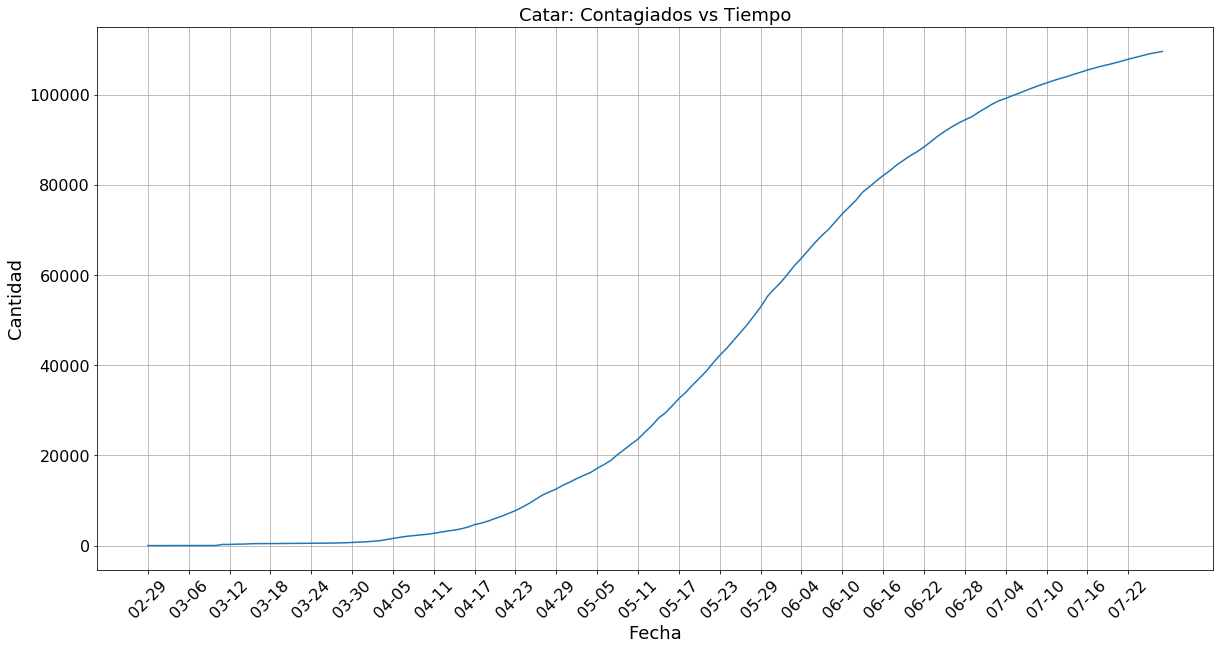

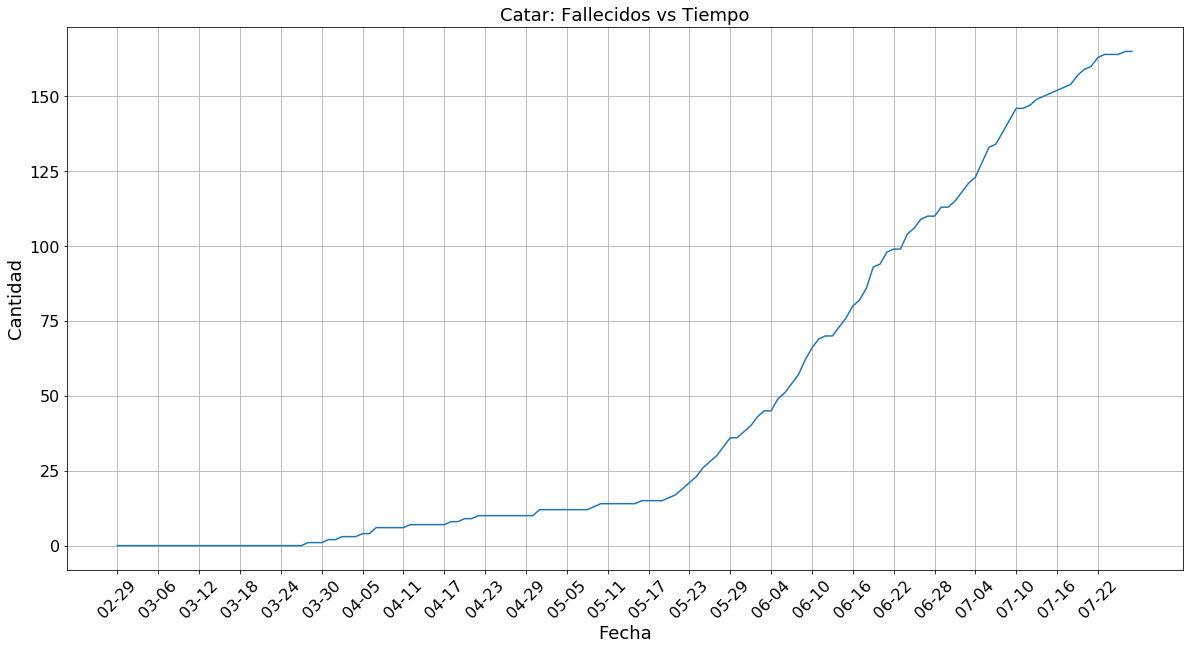

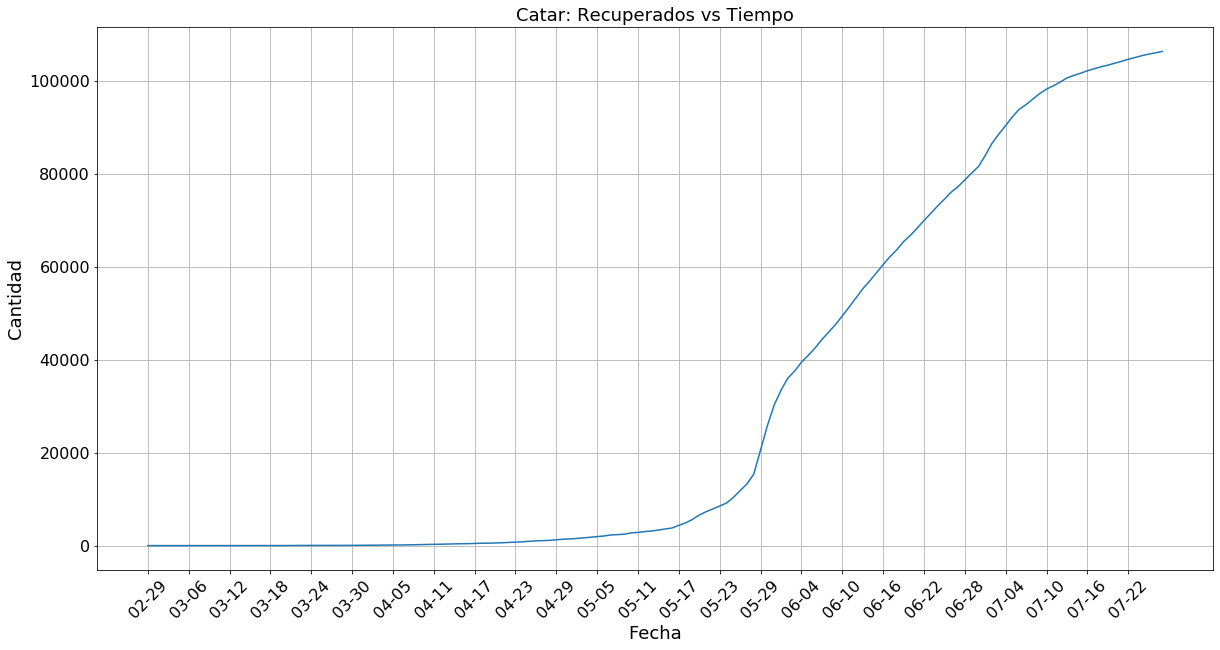

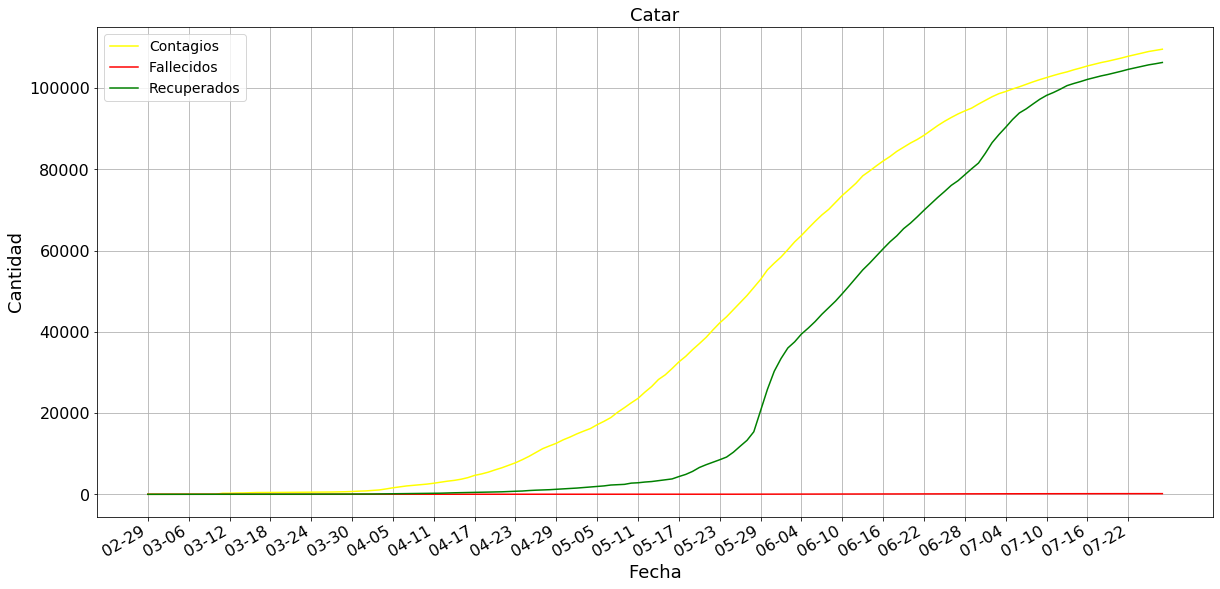

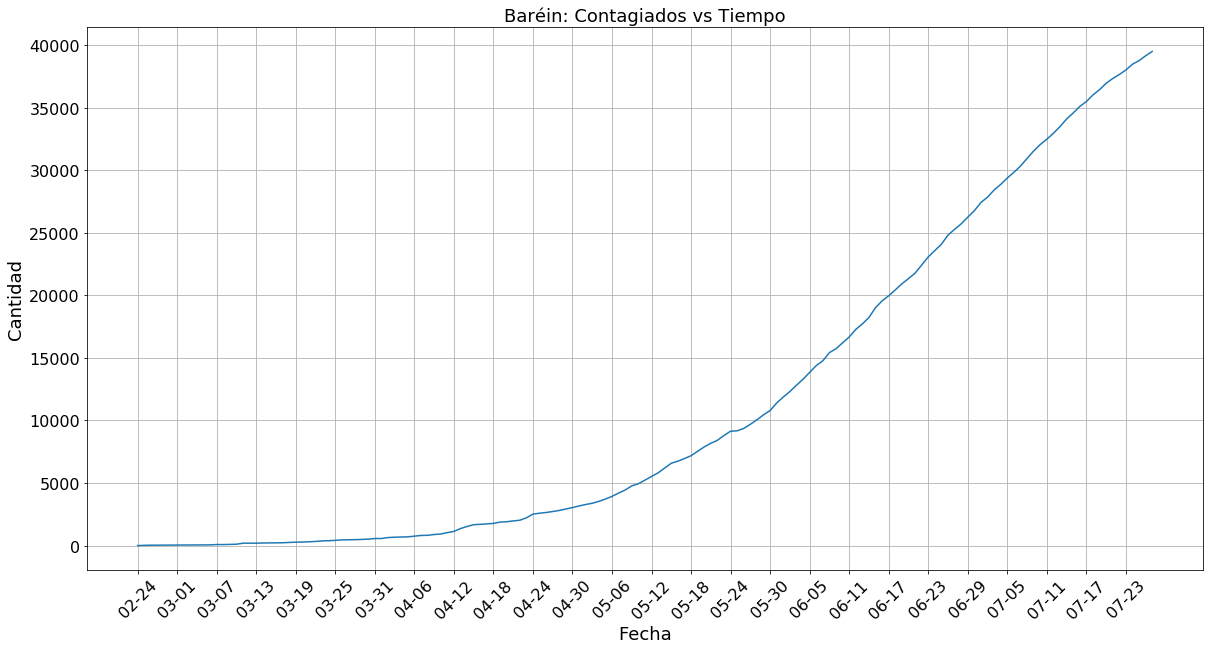

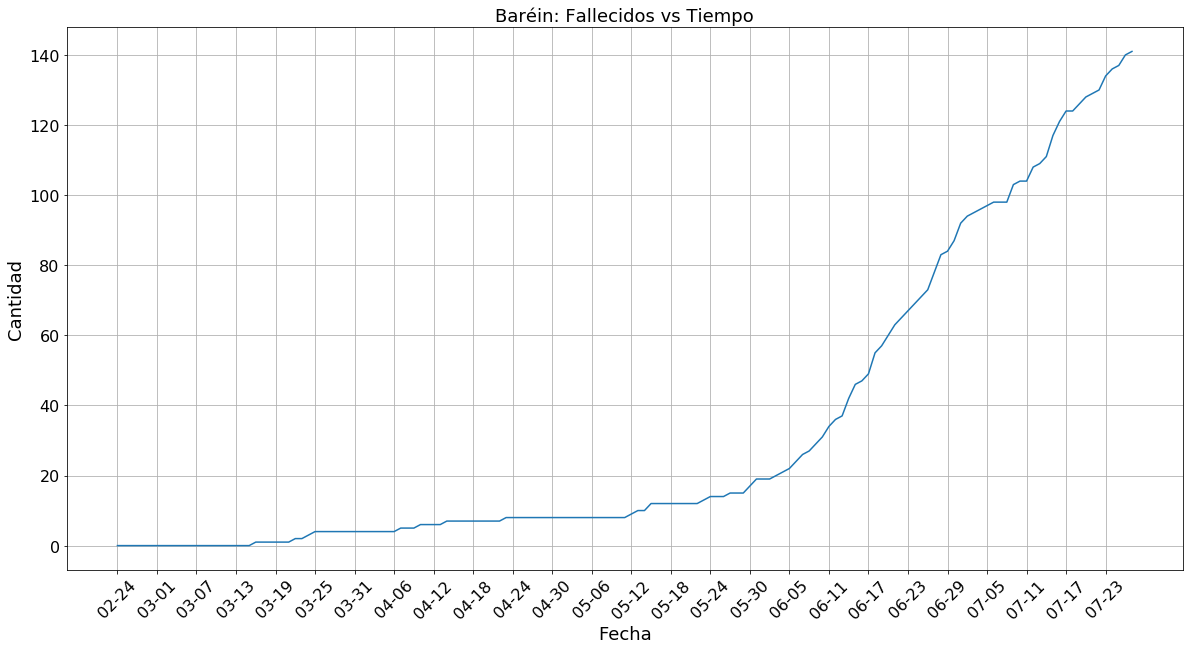

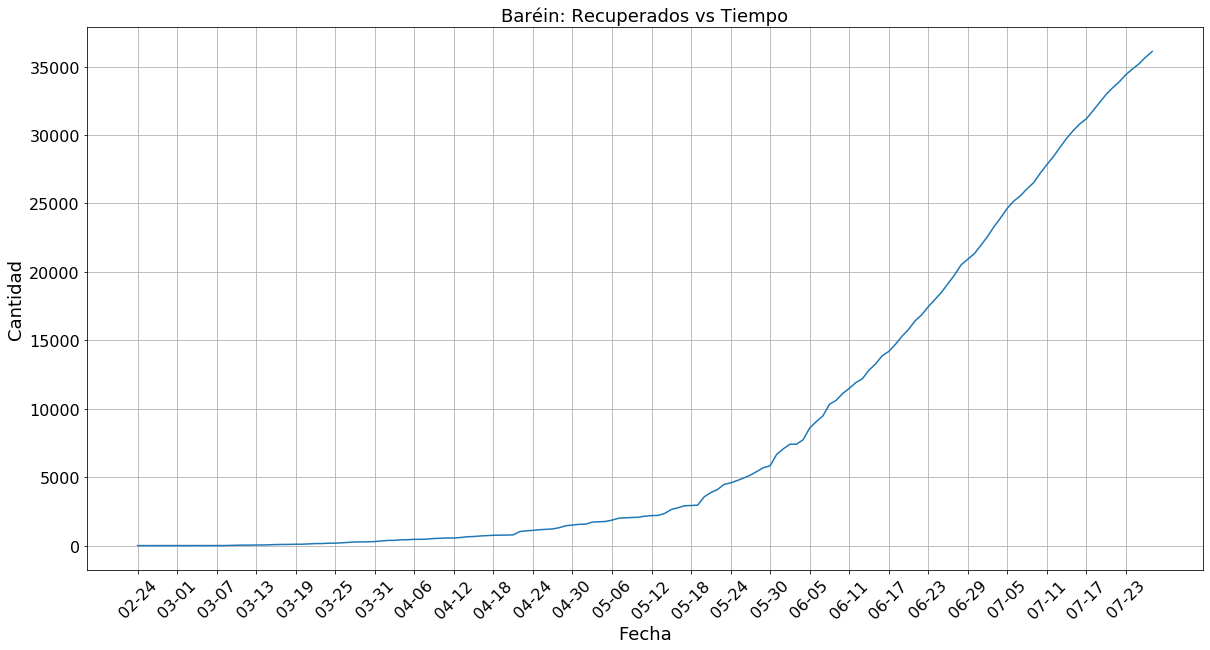

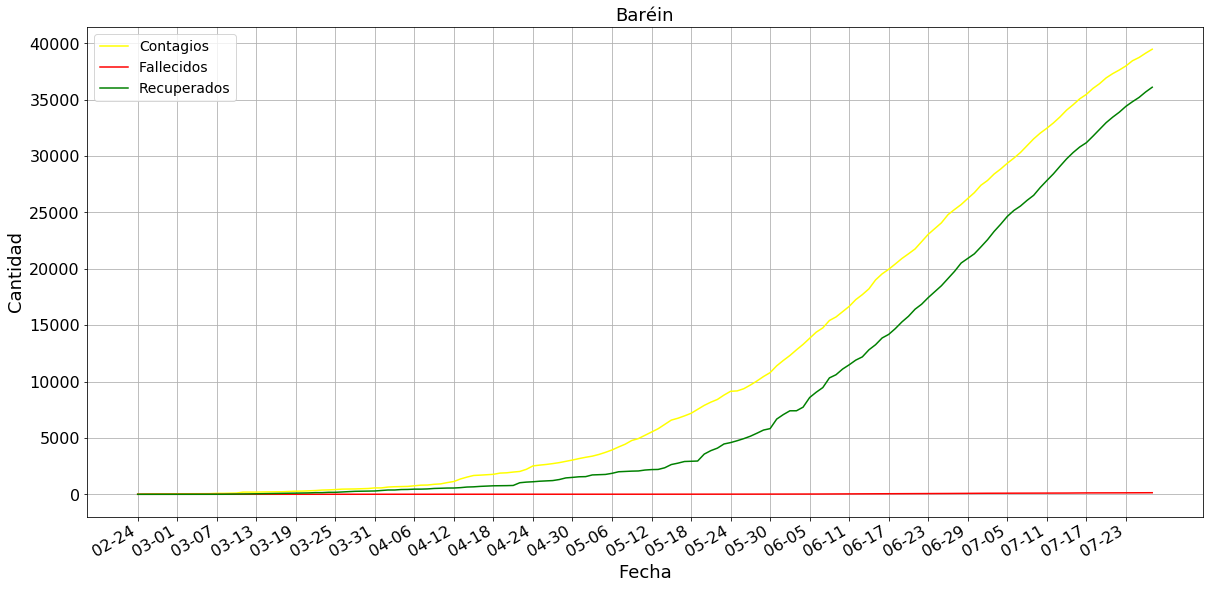

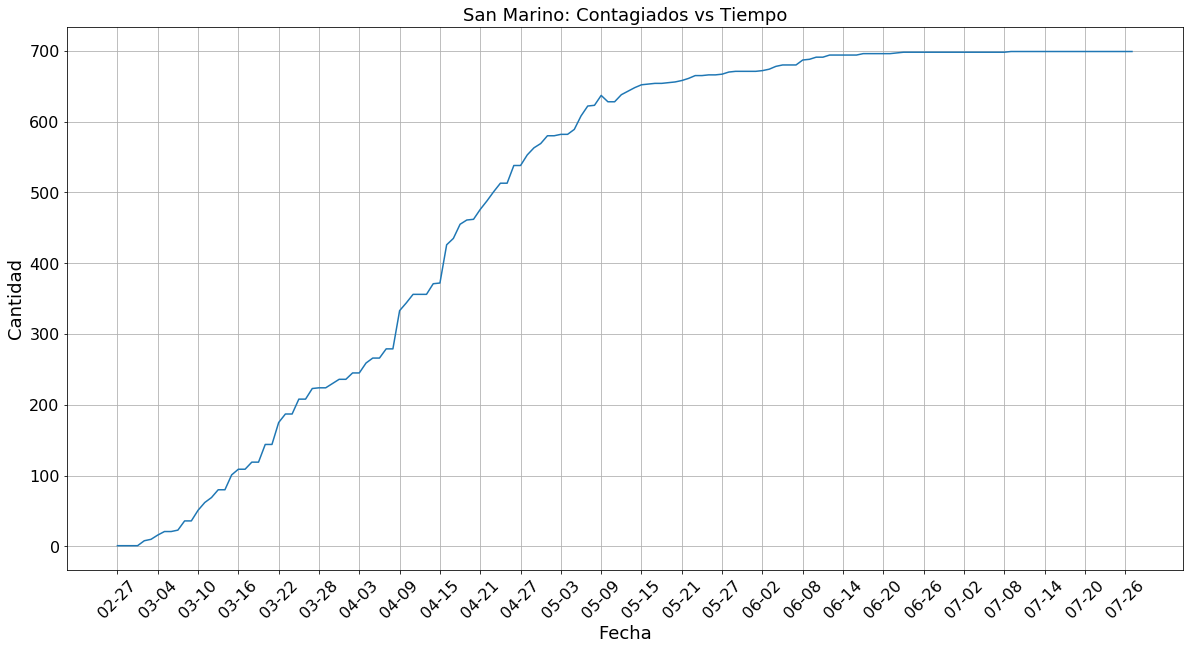

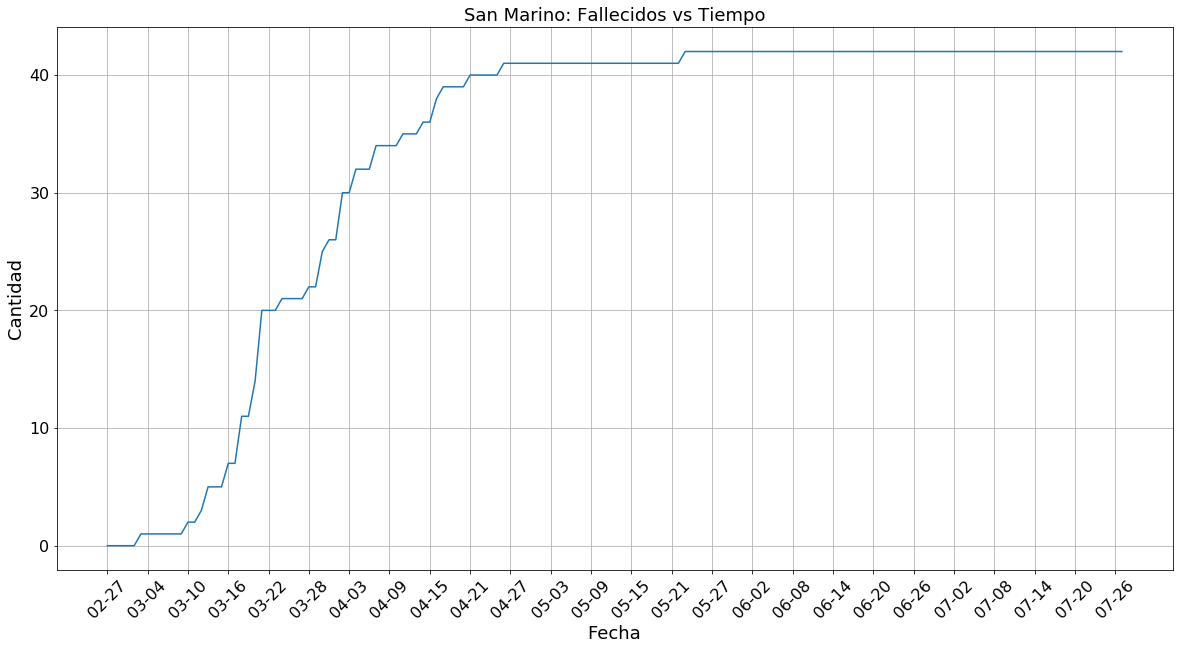

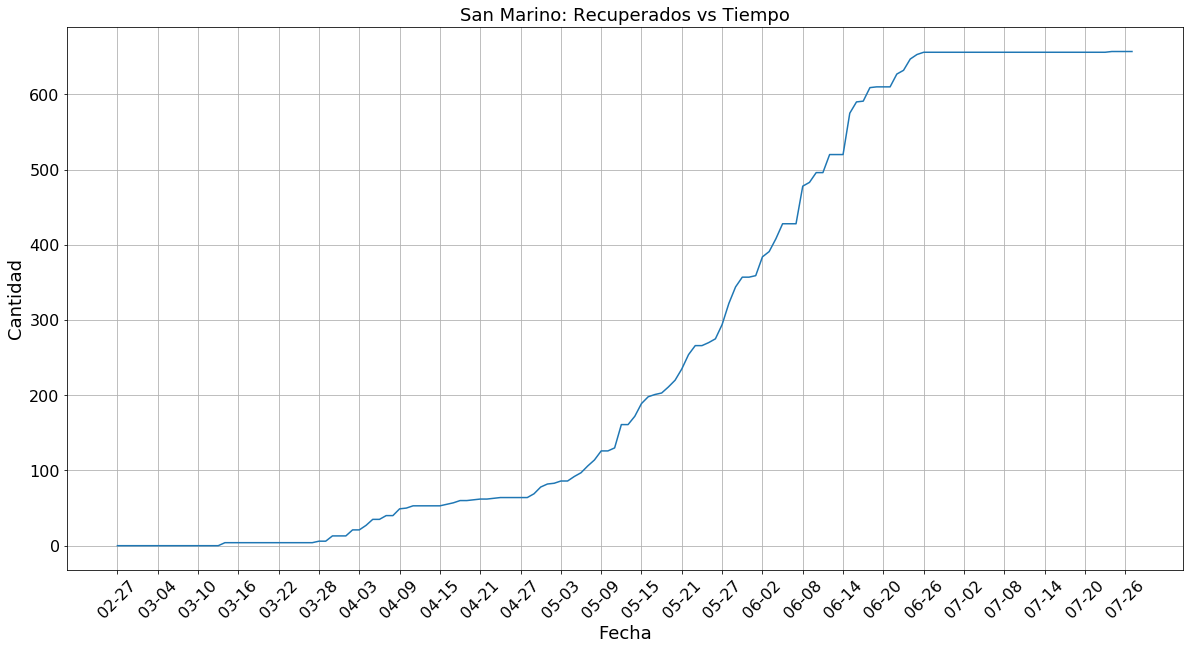

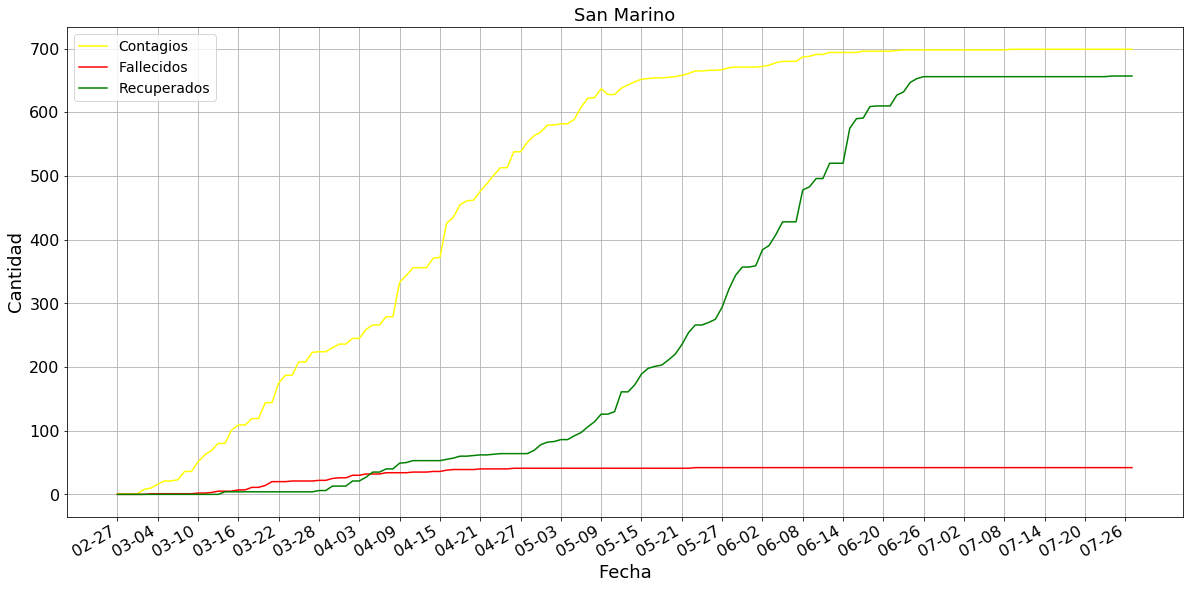

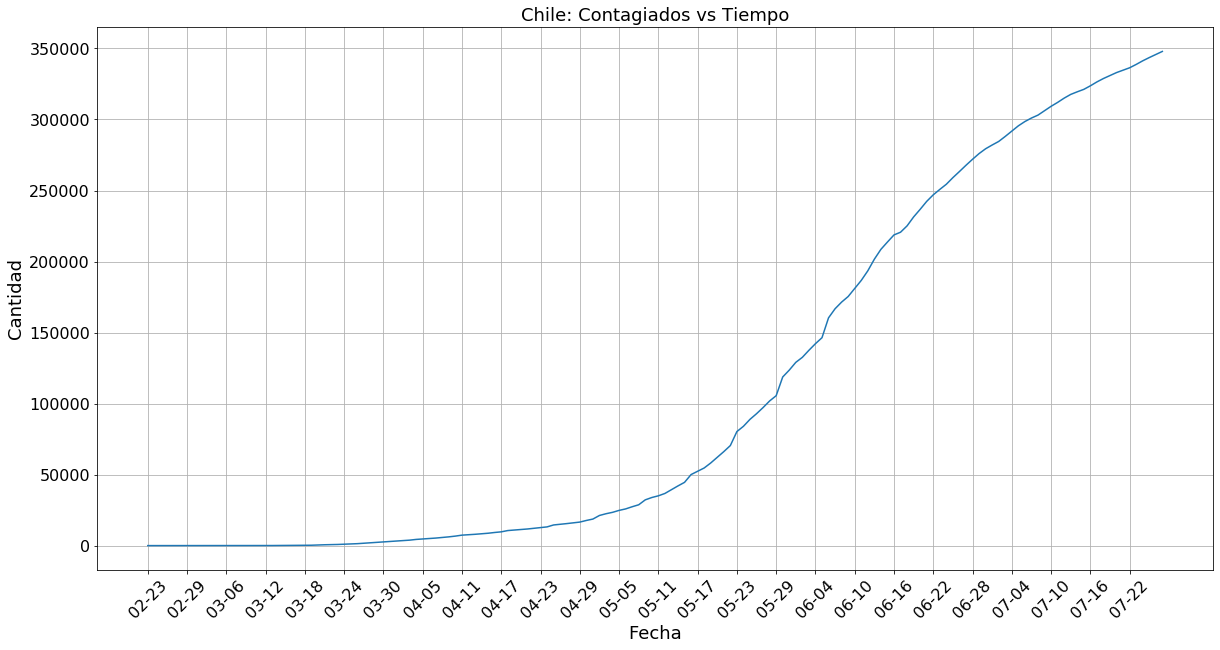

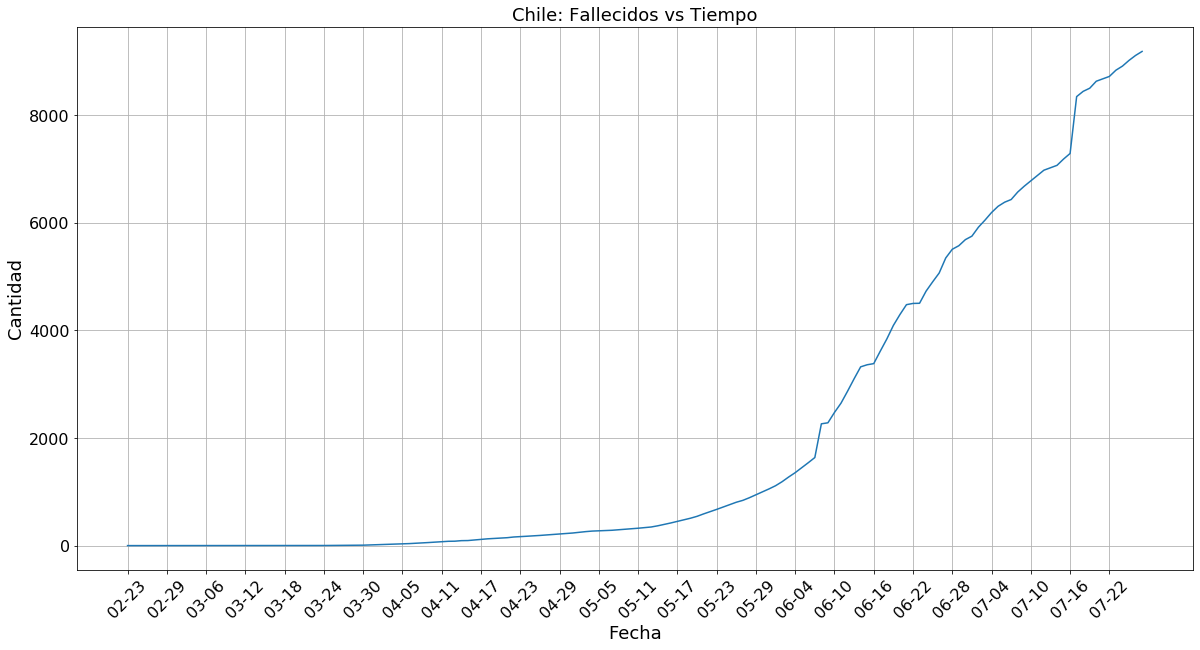

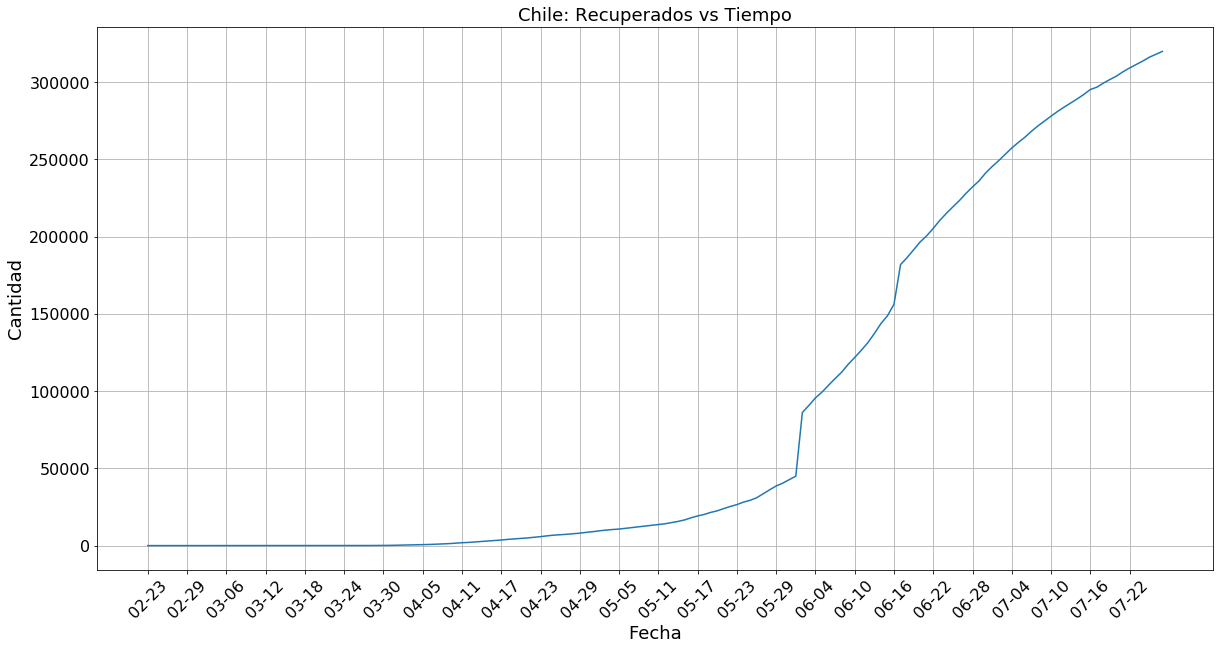

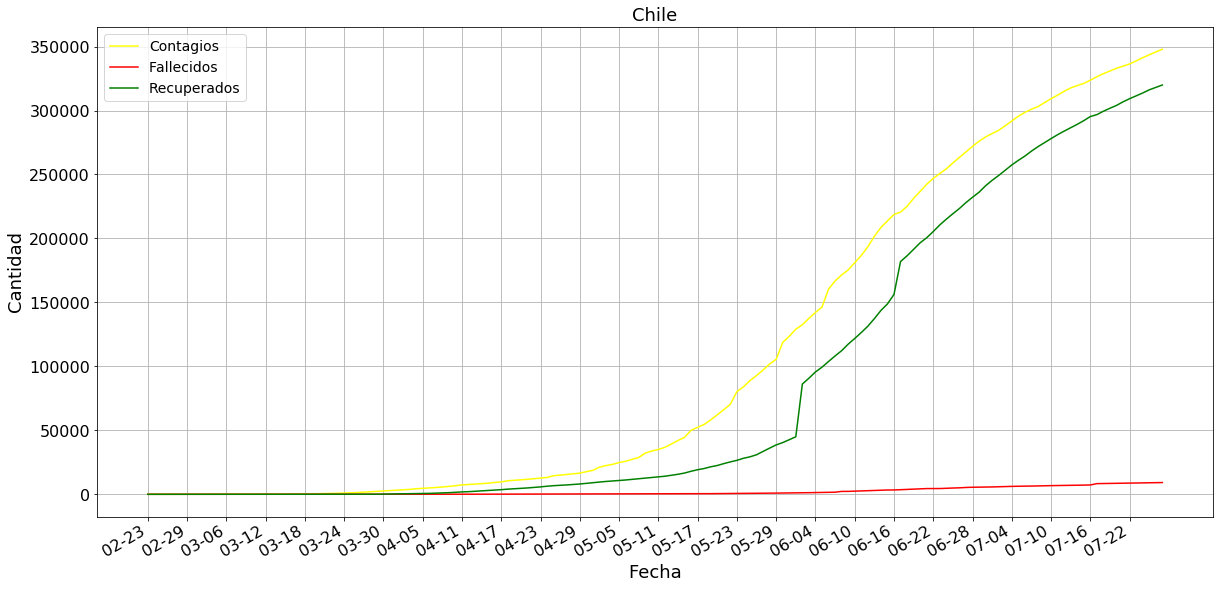

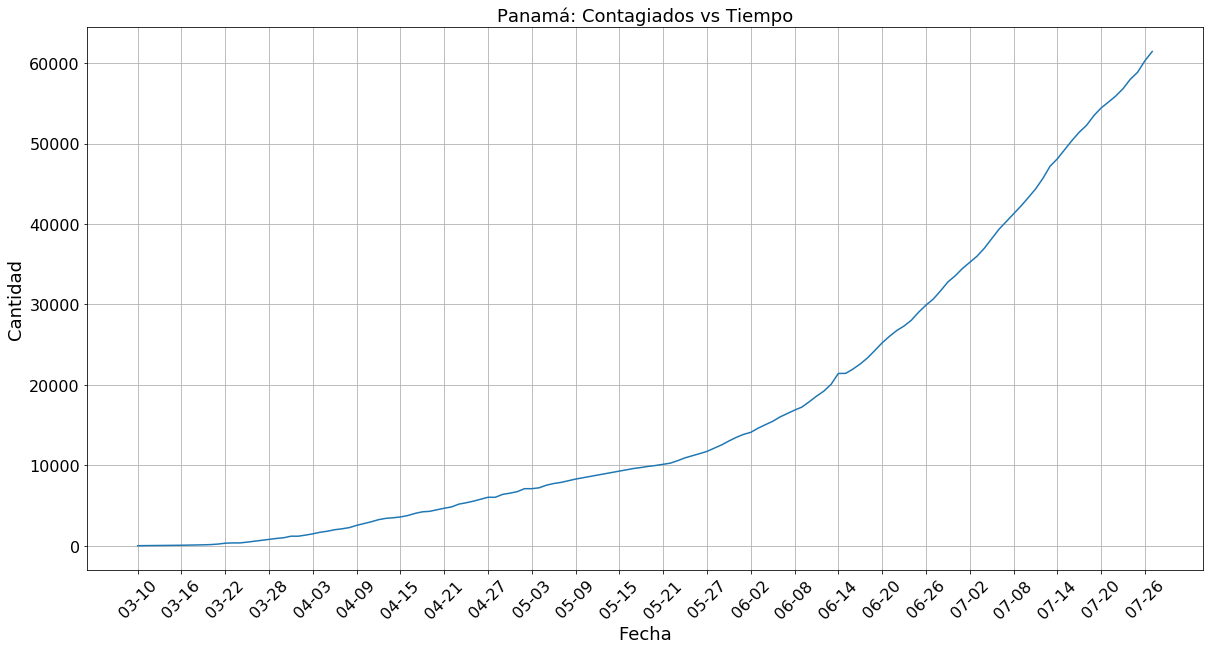

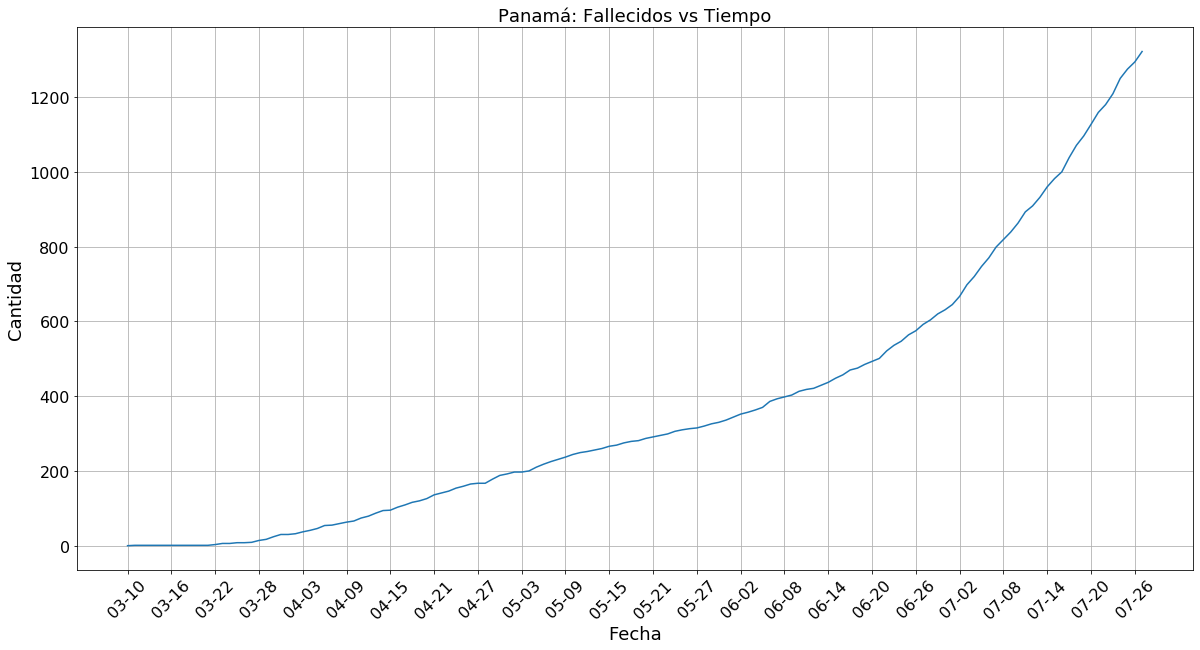

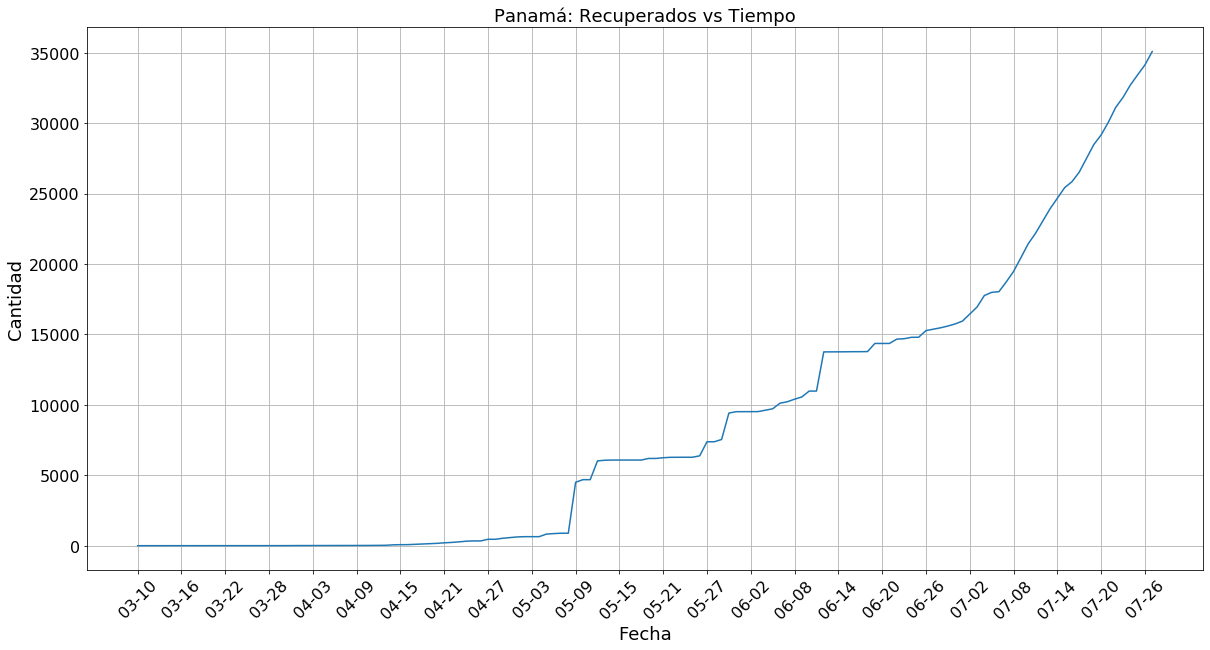

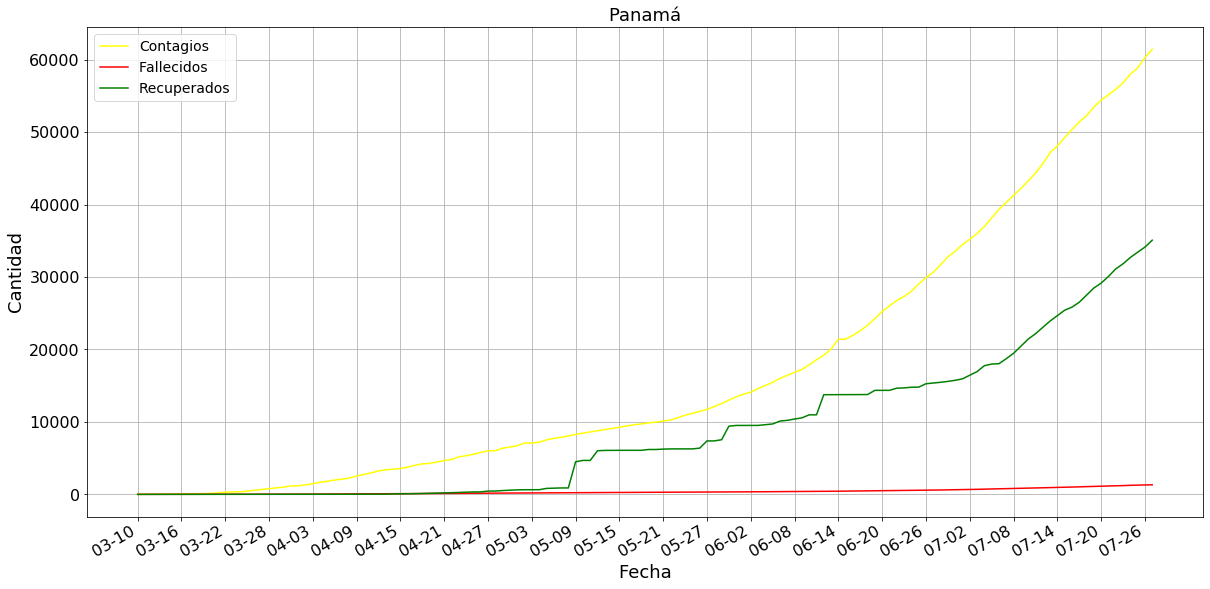

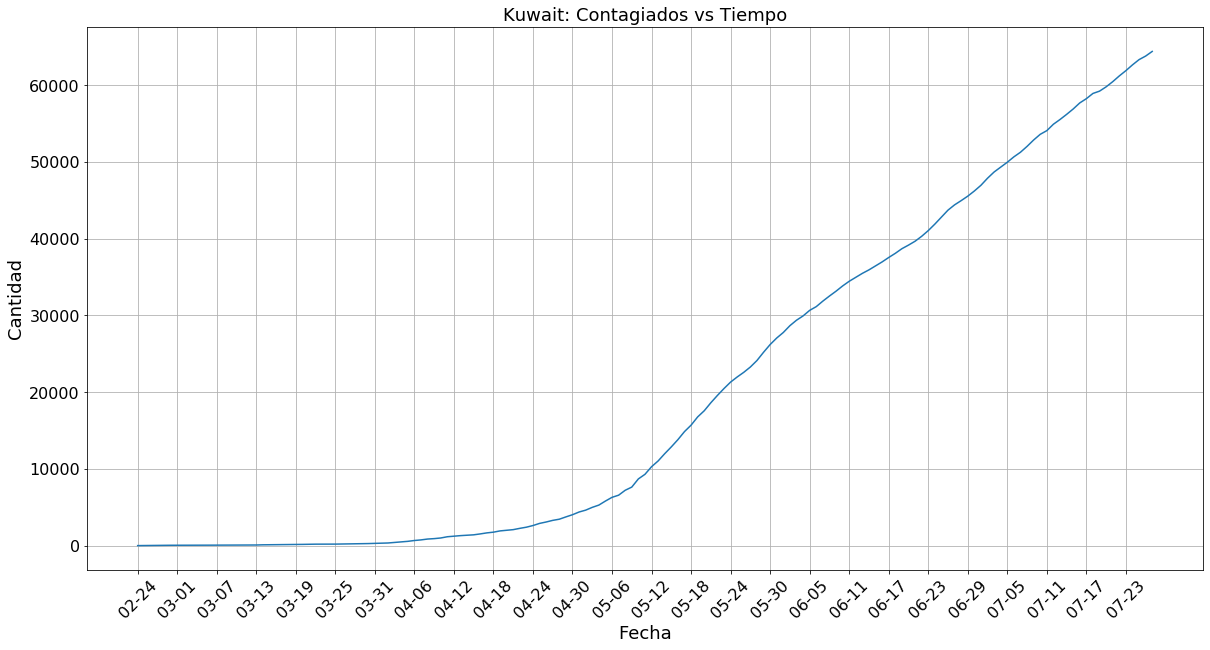

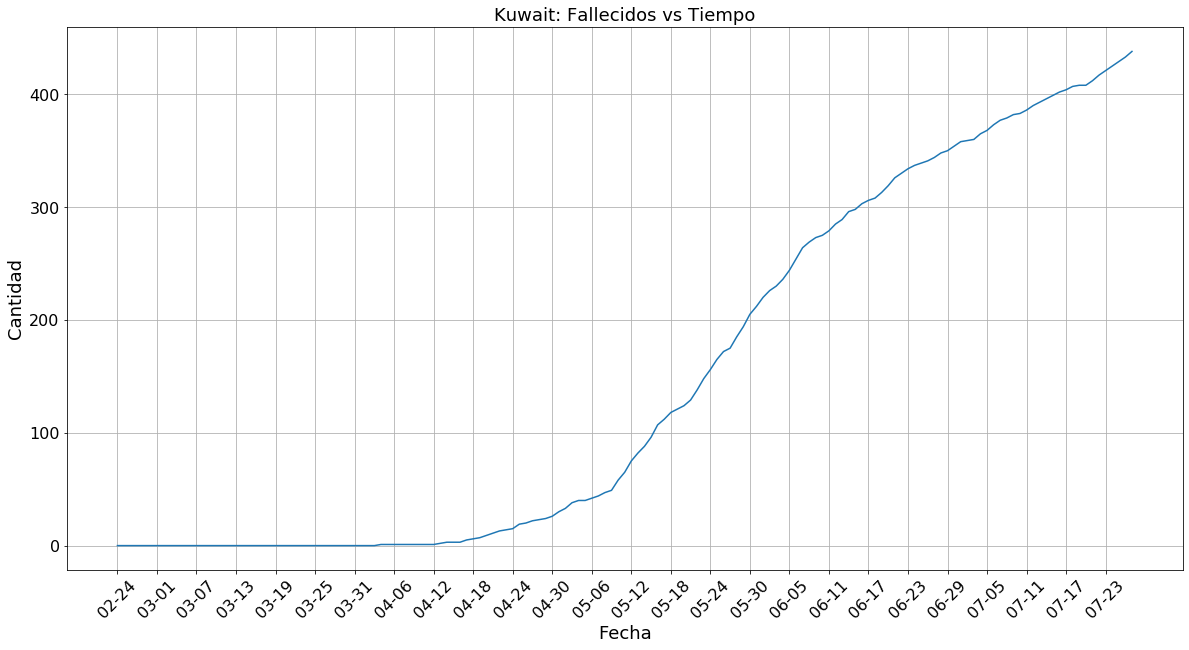

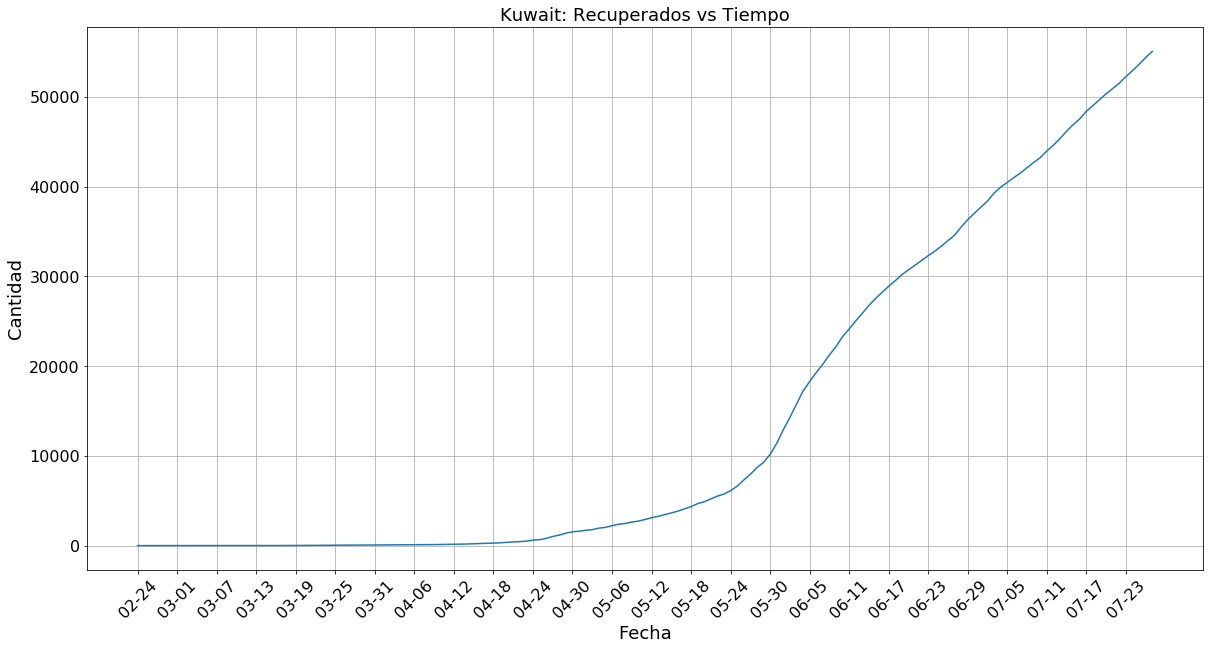

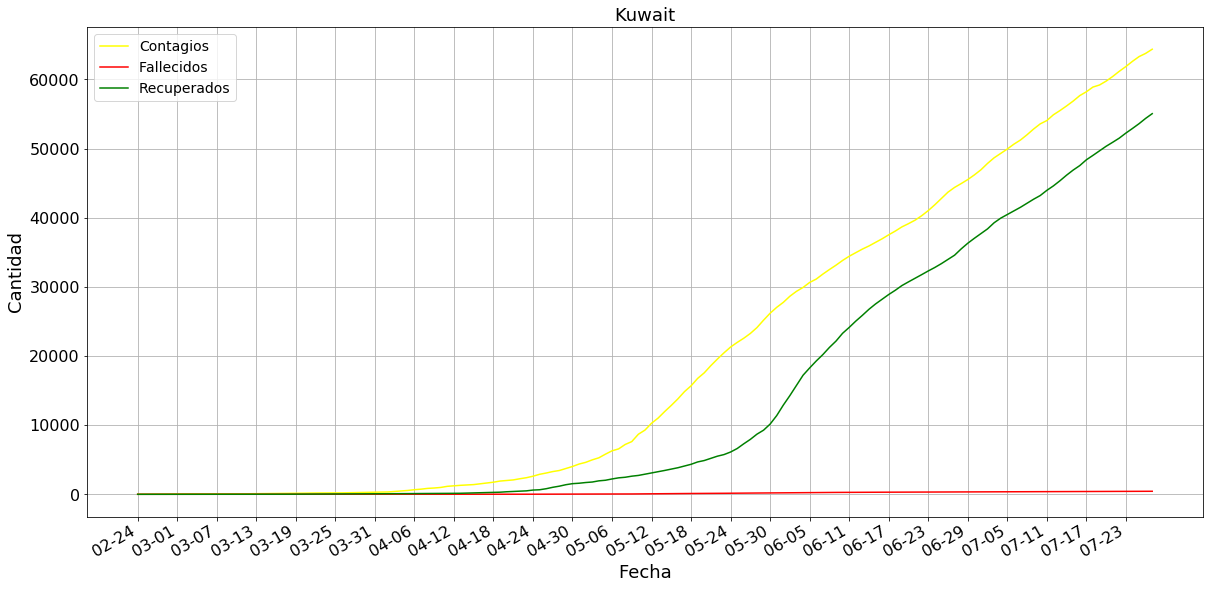

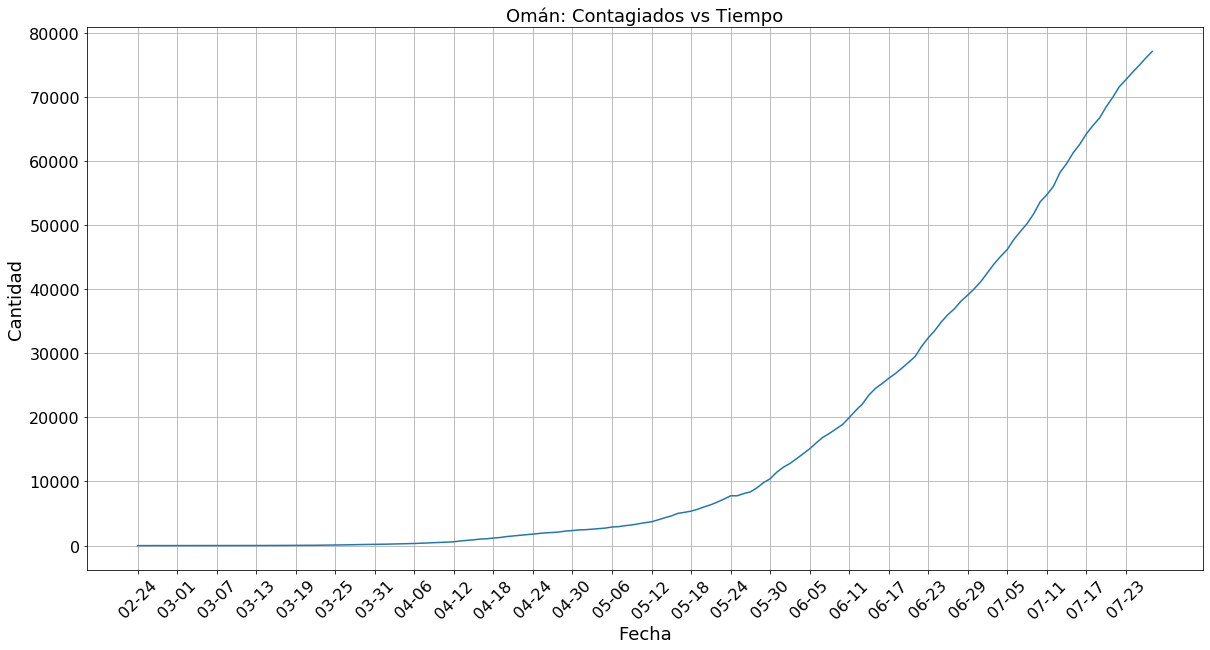

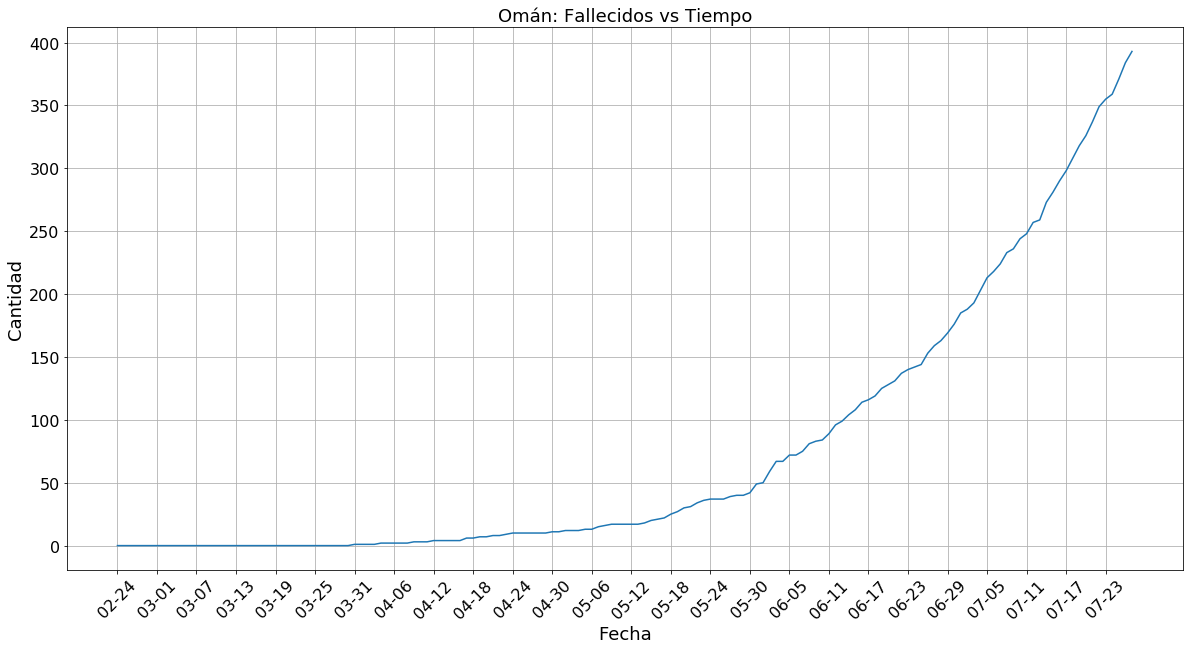

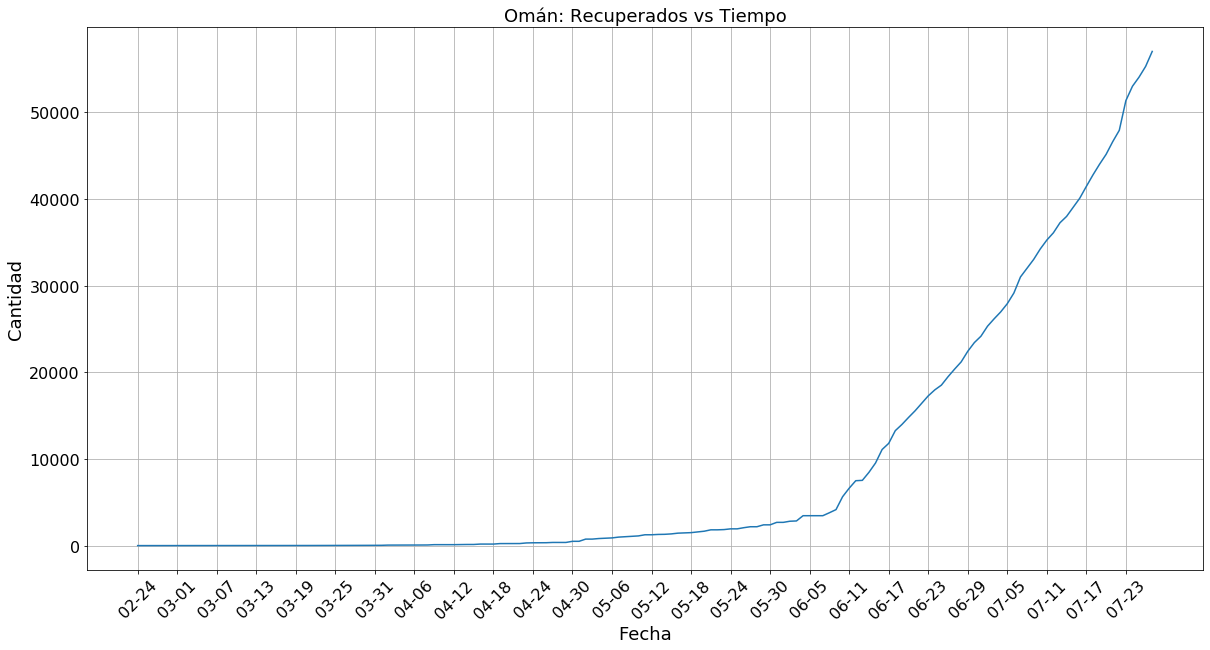

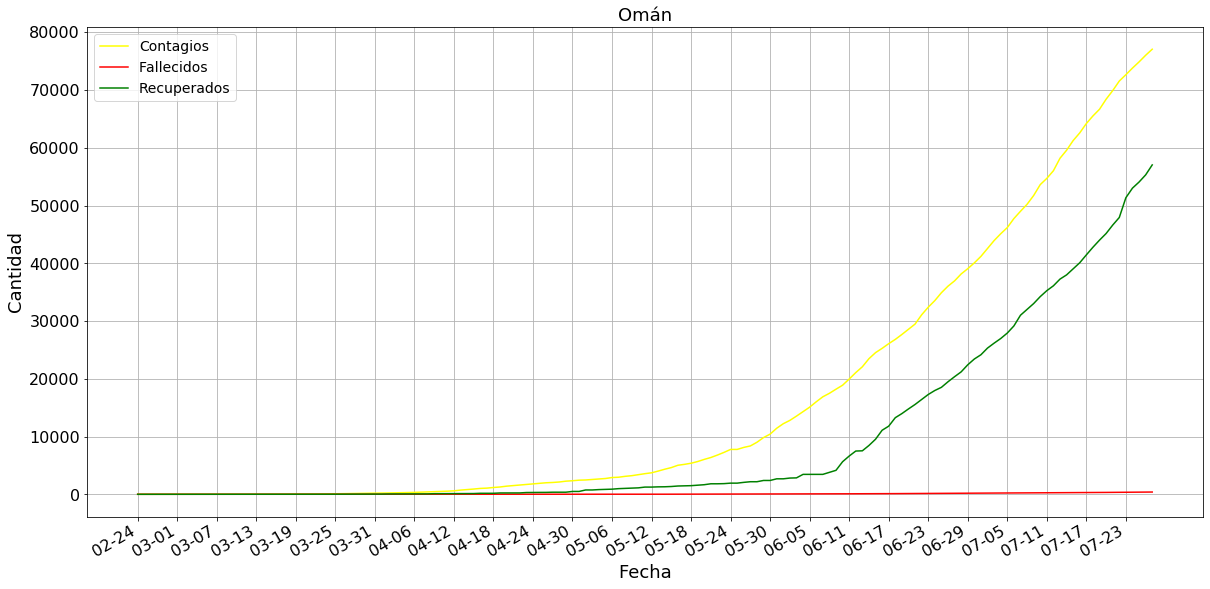

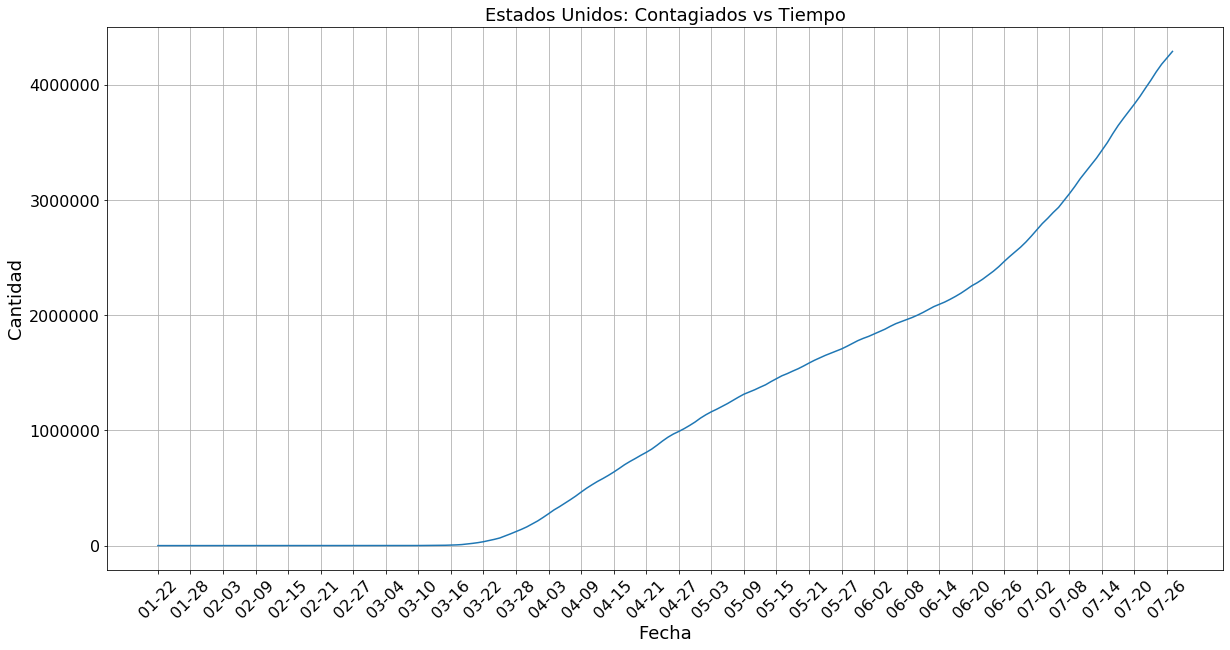

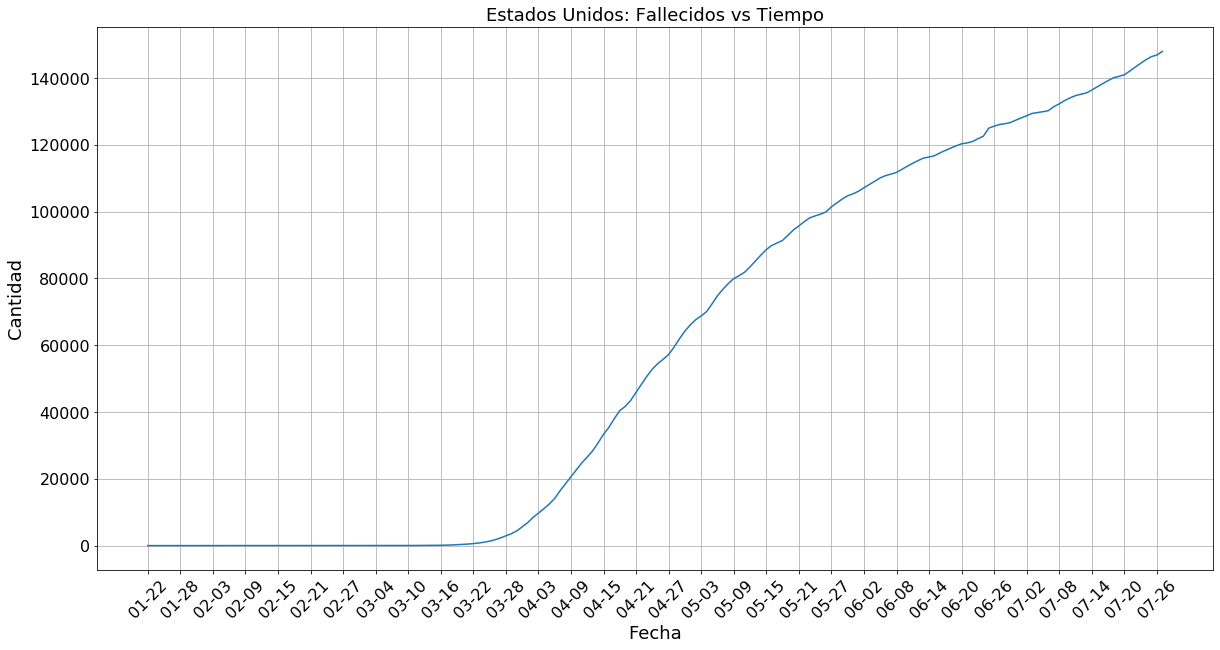

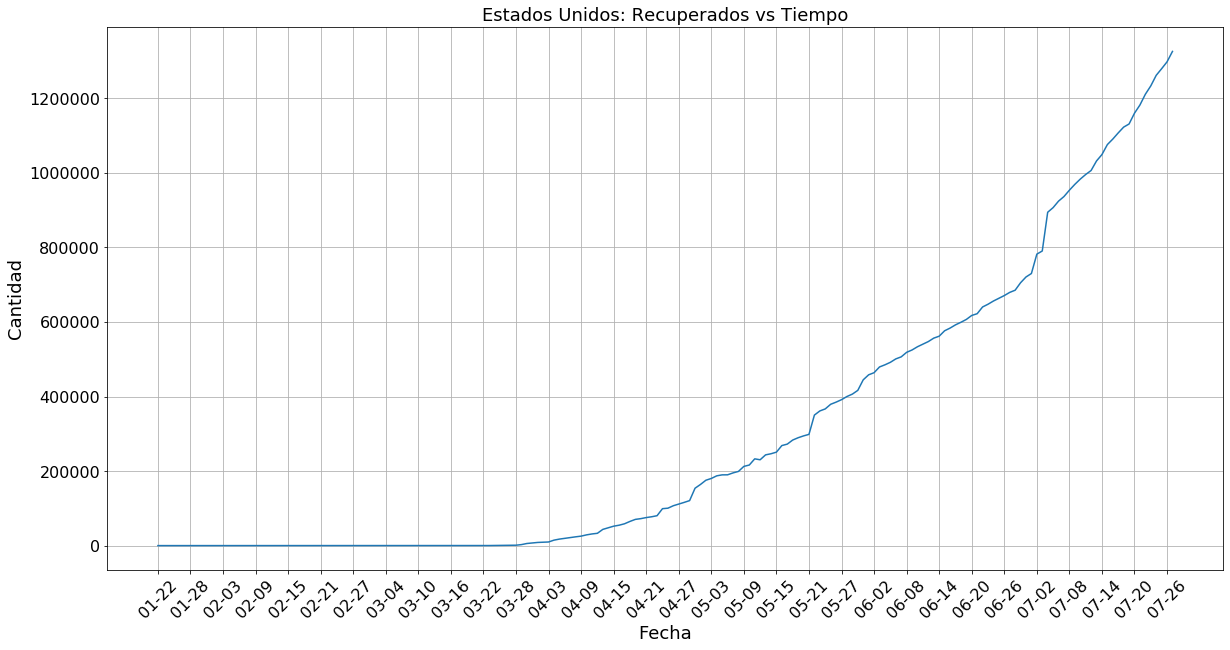

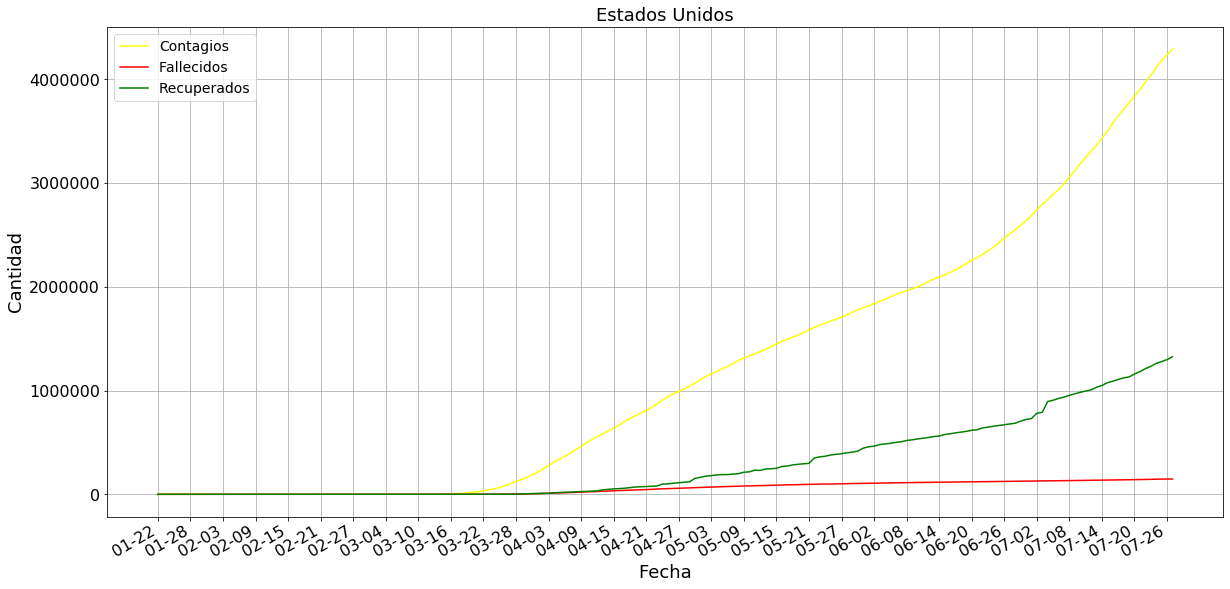

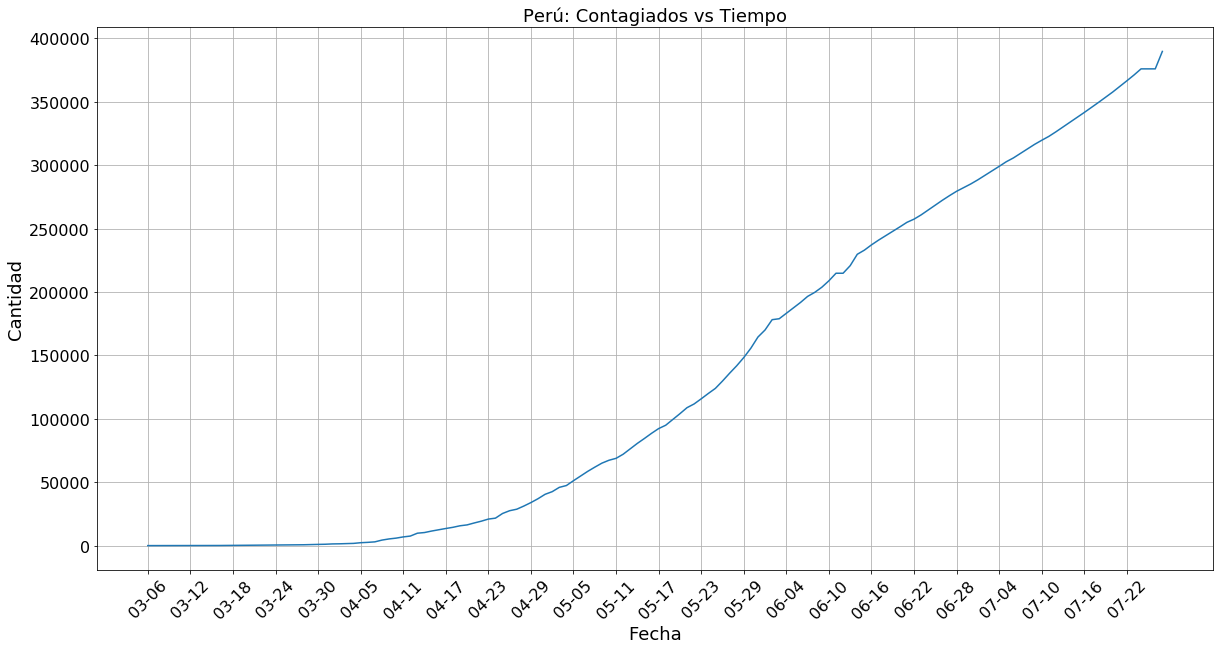

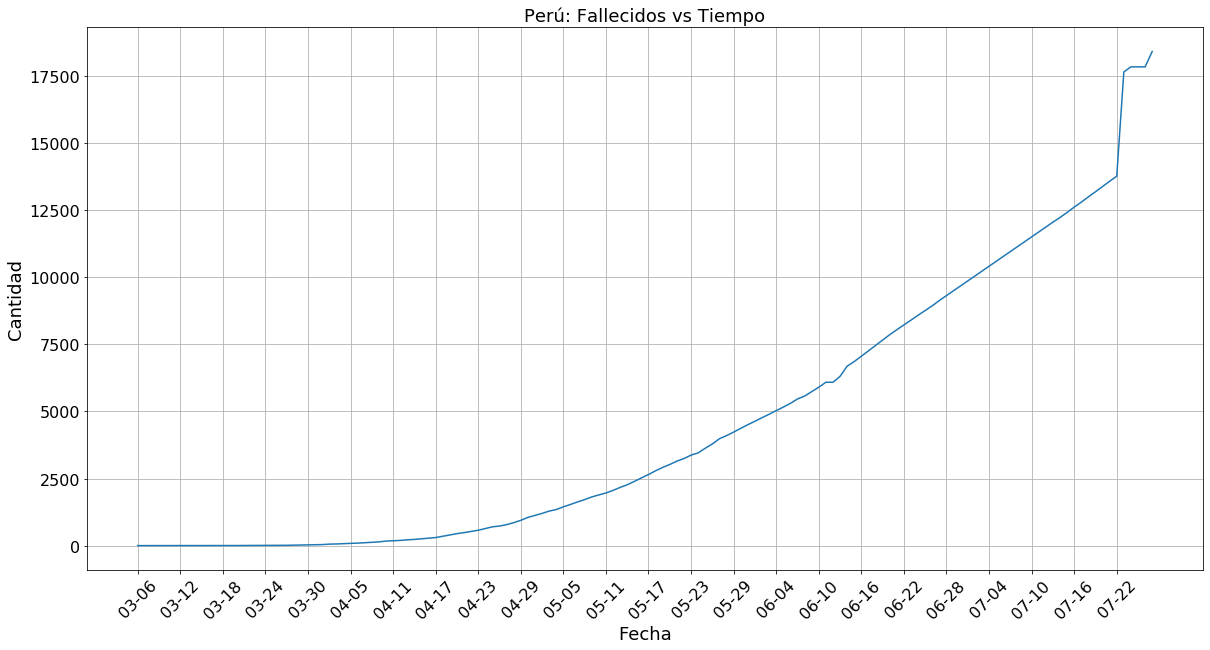

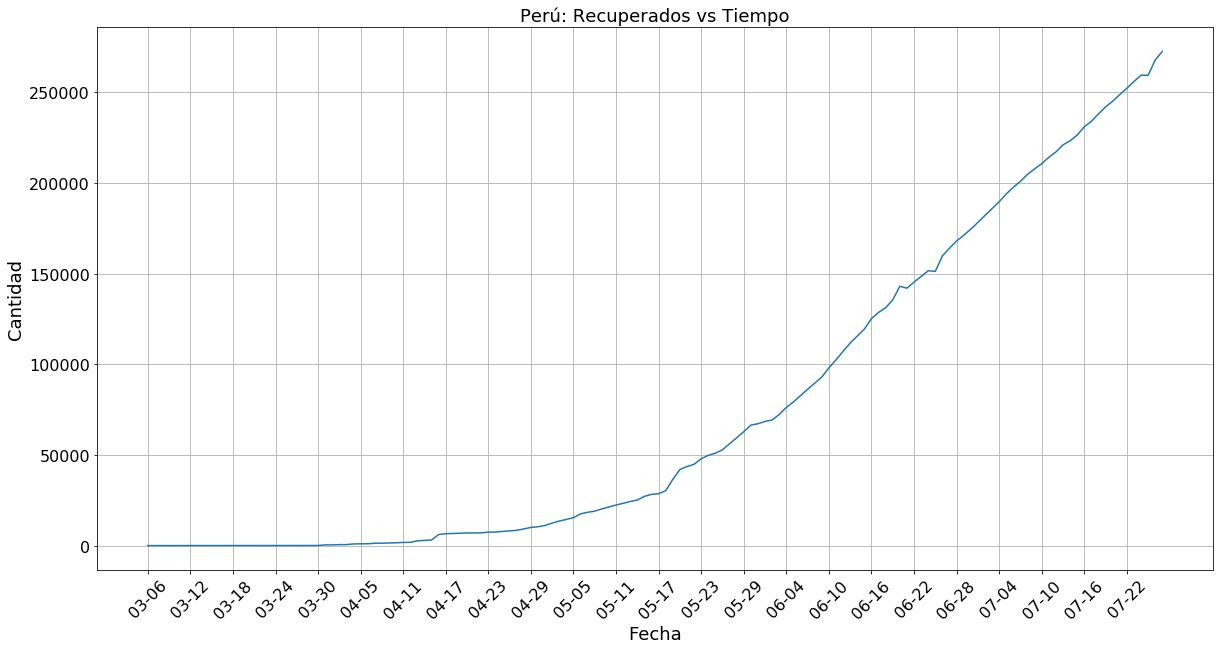

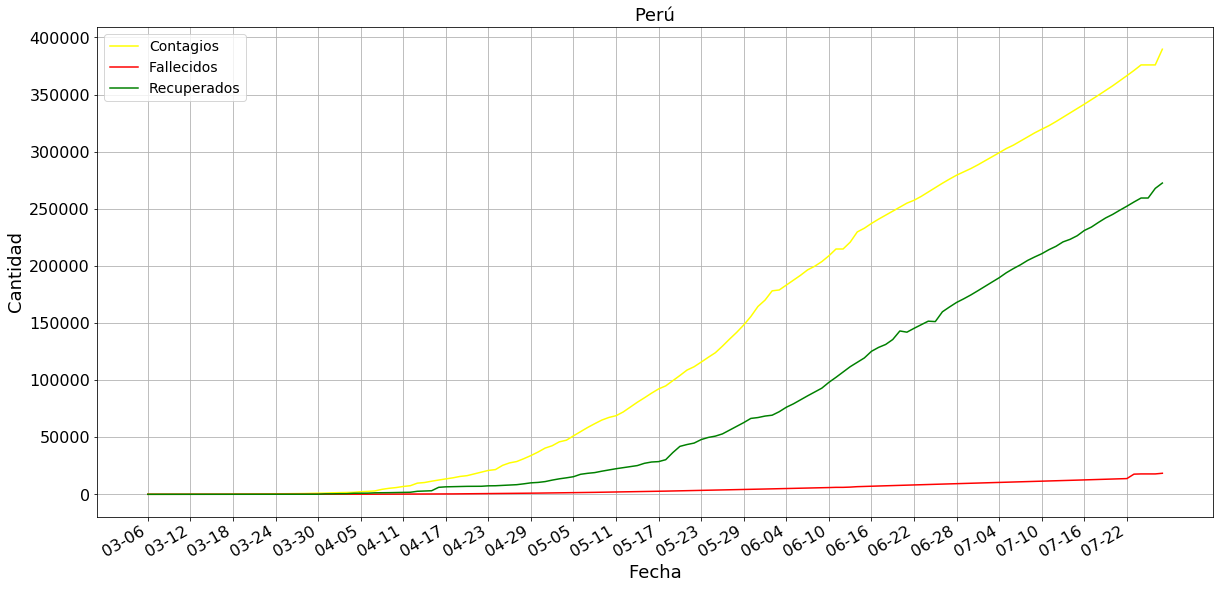

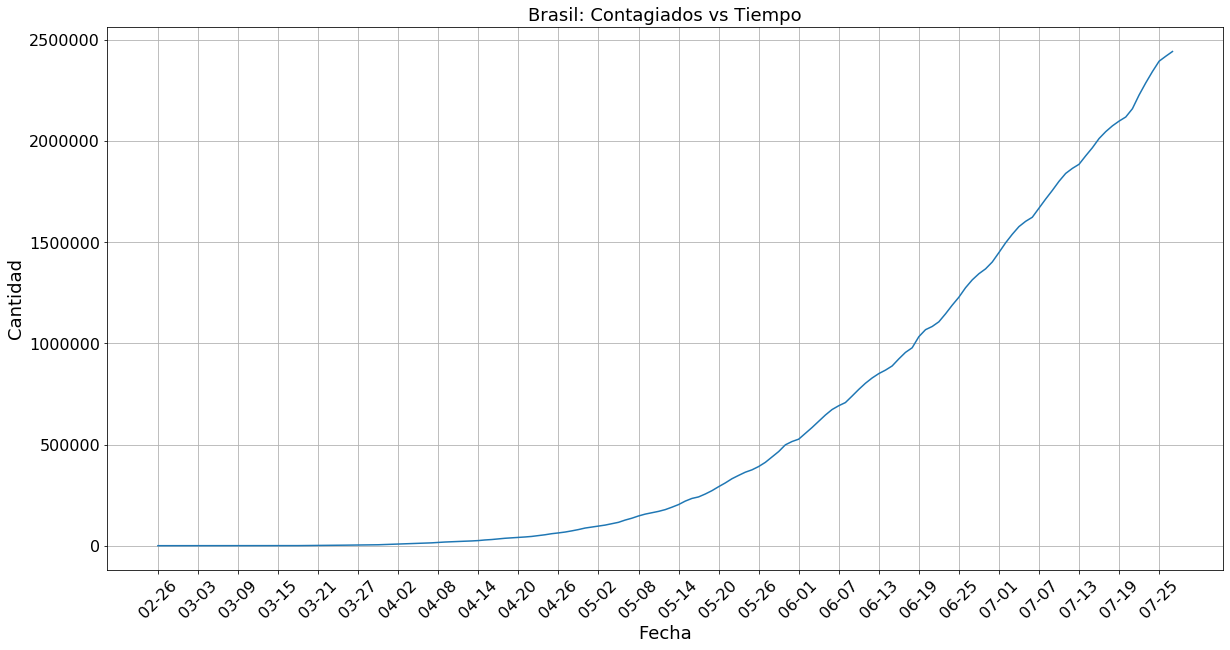

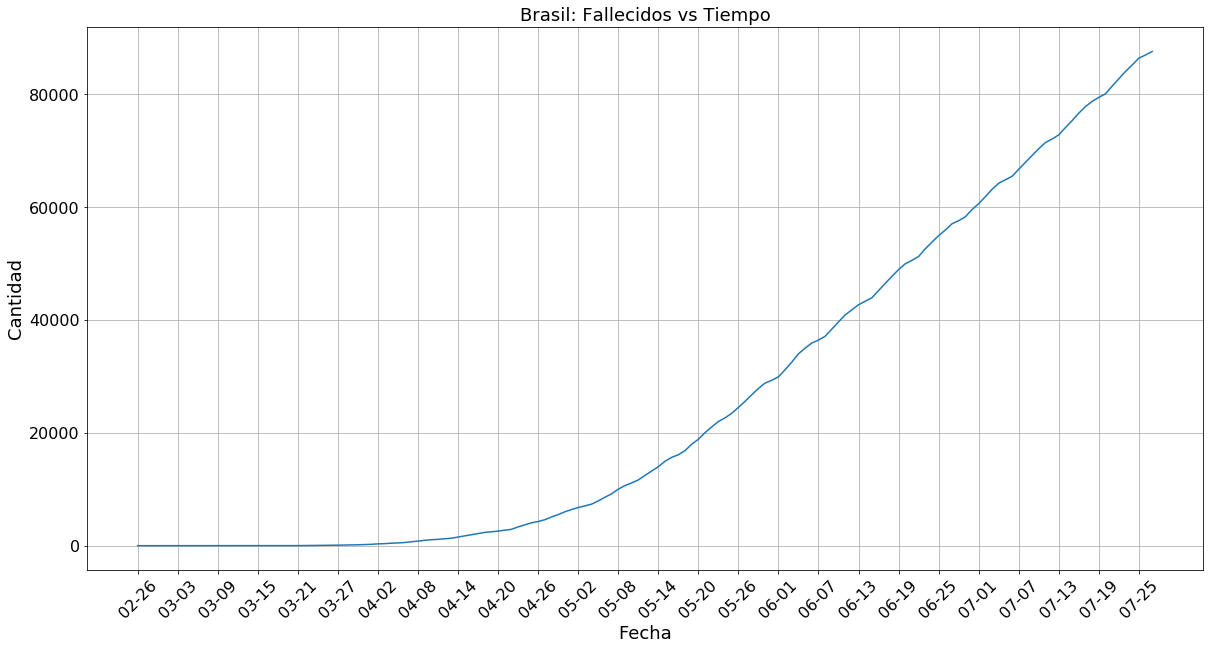

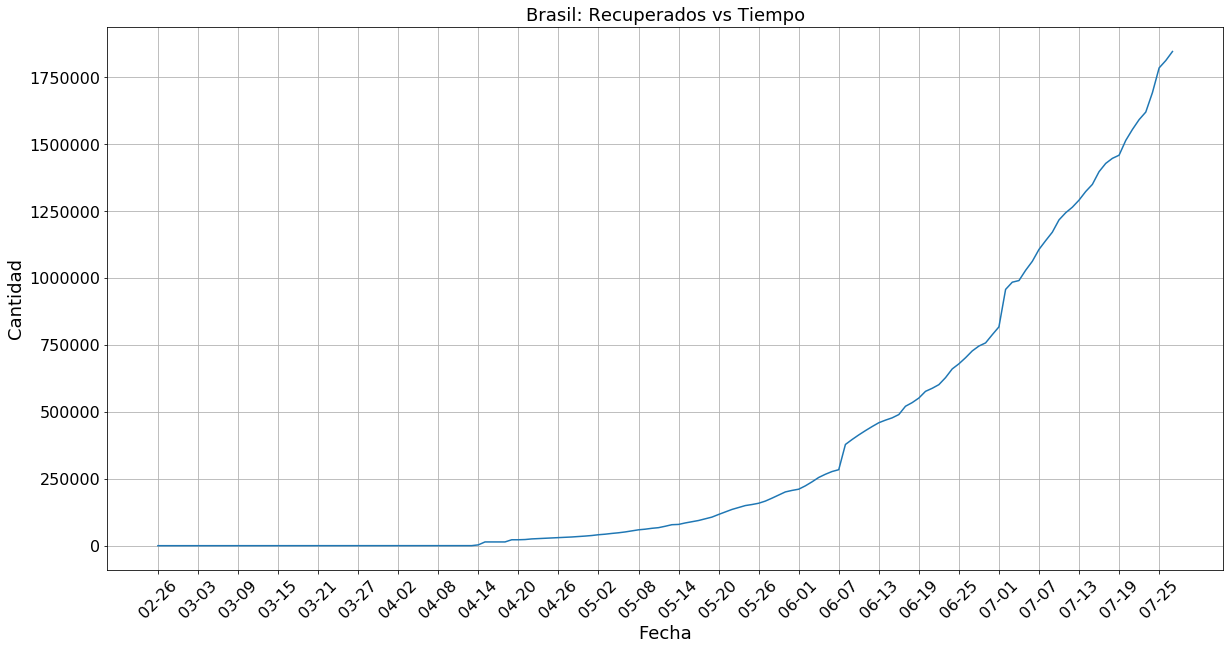

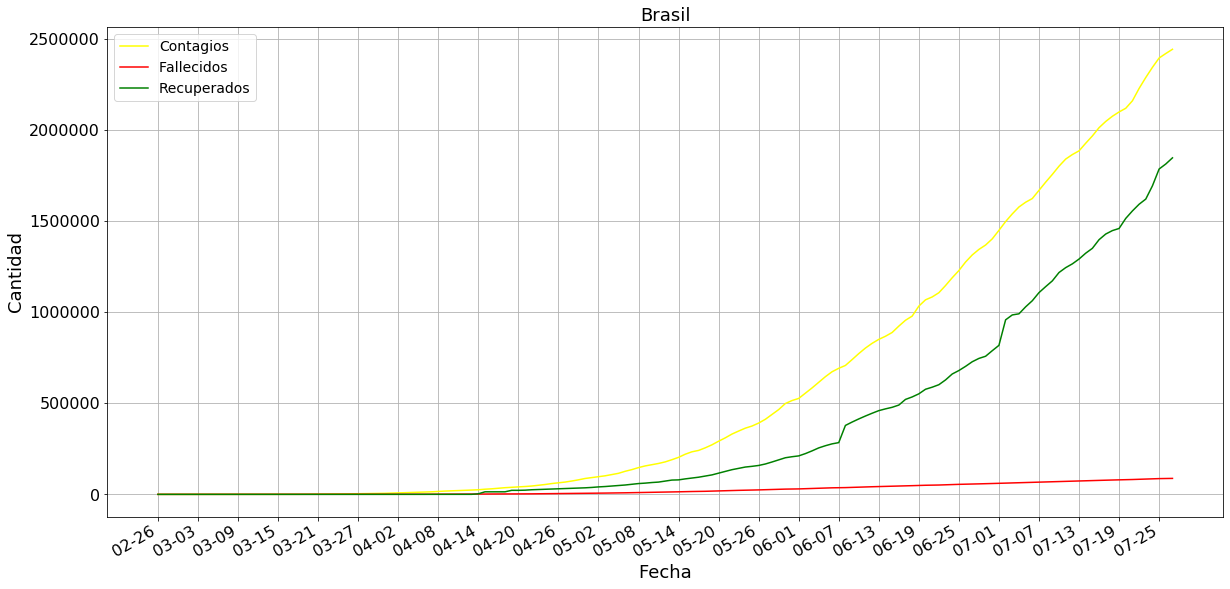

In [8]:
# Normal Ploting
# - Contagiados vs Tiempo
# - Fallecidos vs Tiempo
# - Recuperados vs Tiempo
# - Subplots

count = 0
for country in countries:
    element = ranking_cases[ranking_cases['Country/Region'] == country]
    # Contagiados vs Tiempo
    dictionary = element.groupby('Date')['Confirmed'].sum().to_dict()

    lists = sorted(dictionary.items())
    x1, y1 = zip(*lists)

    plt.figure(figsize=(20,10))
    plt.grid()
    plt.plot(x1, y1)
    plt.title(spanishName[count] + ": Contagiados vs Tiempo", fontsize=18)
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad')
    plt.xticks(range(0,len(dictionary),6))
    plt.xticks(rotation=45)
    plt.savefig("images/" + identificators[count] + "_ct.png")

    # Muertes vs Tiempo
    dictionary = element.groupby('Date')['Deaths'].sum().to_dict()

    lists = sorted(dictionary.items())
    x2, y2 = zip(*lists)

    plt.figure(figsize=(20,10))
    plt.grid()
    plt.plot(x2, y2)
    plt.title(spanishName[count] + ": Fallecidos vs Tiempo", fontsize=18)
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad')
    plt.xticks(range(0,len(dictionary),6))
    plt.xticks(rotation=45)
    plt.savefig("images/" + identificators[count] + "_ft.png")

    # Recuperados vs Tiempo
    dictionary = element.groupby('Date')['Recovered'].sum().to_dict()

    lists = sorted(dictionary.items())
    x3, y3 = zip(*lists)

    plt.figure(figsize=(20,10))
    plt.grid()
    plt.plot(x3, y3)
    plt.title(spanishName[count] + ": Recuperados vs Tiempo", fontsize=18)
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad')
    plt.xticks(range(0,len(dictionary),6))
    plt.xticks(rotation=45)
    plt.savefig("images/" + identificators[count] + "_rt.png")

    # Todas vs Tiempo
    fig,ax = plt.subplots(figsize=(20,10))
    plt.grid()
    ax.plot(x1, y1, color="yellow", label='Contagios')
    ax.plot(x2, y2, color="red", label='Fallecidos')
    ax.plot(x3, y3, color="green", label='Recuperados')
    plt.title(spanishName[count])
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad')
    plt.xticks(range(0,len(dictionary),6))
    fig.autofmt_xdate()
    ax.legend();
    plt.savefig("images/" + identificators[count] + "_all.png")
    count = count + 1

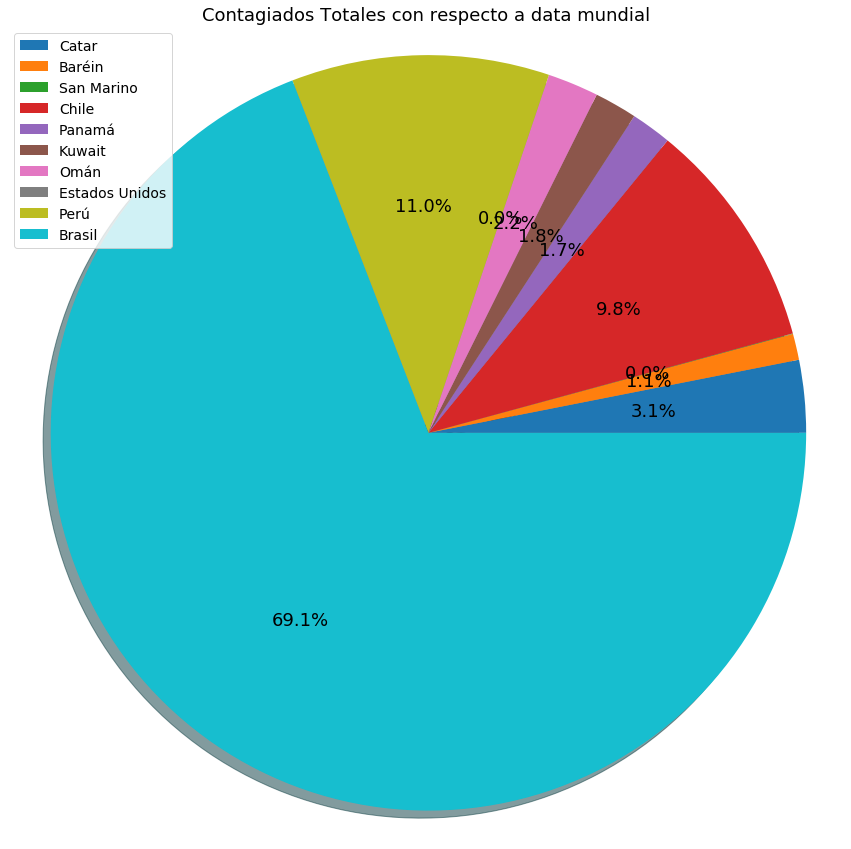

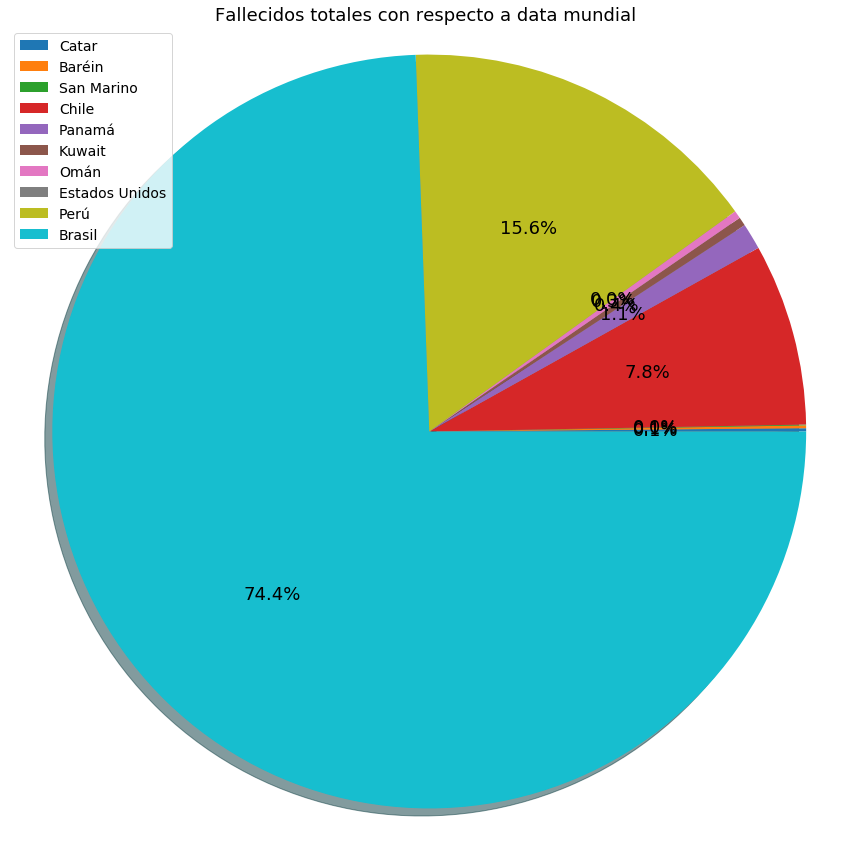

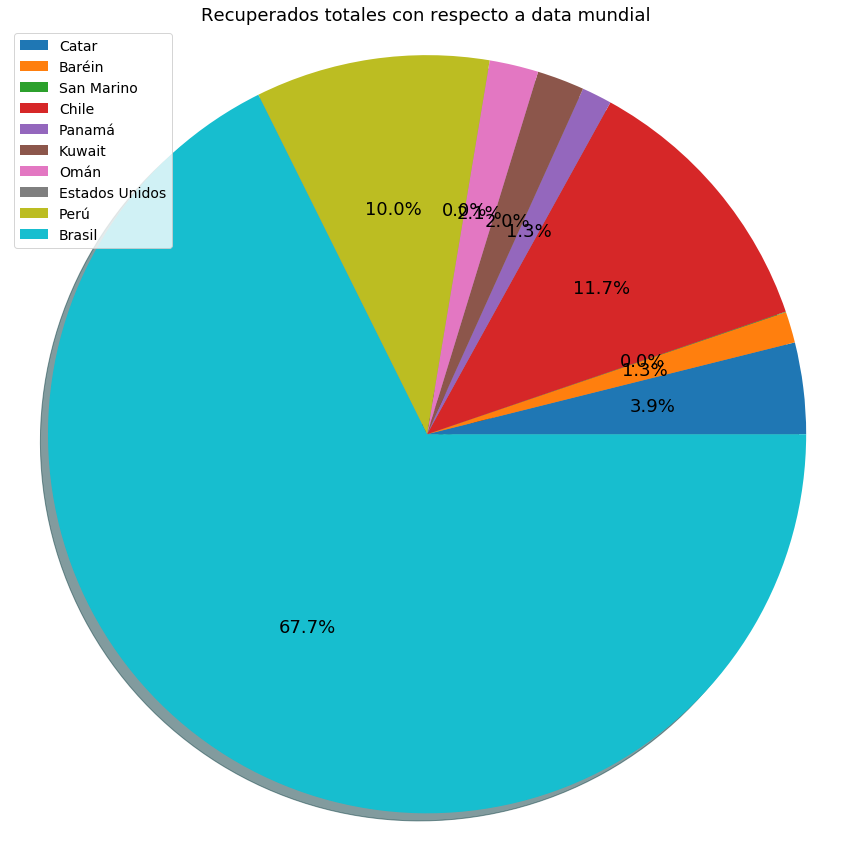

In [46]:
# Pie charts ploting
# - Contagiados vs Tiempo
# - Fallecidos vs Tiempo
# - Recuperados vs Tiempo
# - Subplots

labels = ['Contagiados Totales', 'Fallecidos totales', 'Recuperados totales']
identificators = ['cases', 'deaths', 'recovereds']
cases_sizes = []
deaths_sizes = []
recovered_sizes = []

for country in countries:
    element = ranking_cases[(ranking_cases['Country/Region'] == country) & (ranking_cases['Date'] == '07-27')]
    total_cases = element['Confirmed']
              
    cases_sizes.append(element['Confirmed'].sum())
    deaths_sizes.append(element['Deaths'].sum())
    recovered_sizes.append(element['Recovered'].sum())

count = 0
for ident in identificators:
    patches,ax = plt.subplots(figsize=(15,15))
    if(ident == 'cases'):
        sizes = cases_sizes
    elif(ident == 'deaths'):
        sizes = deaths_sizes
    else:
        sizes = recovered_sizes
    ax.pie(sizes, autopct='%.1f%%', shadow=True)
    ax.legend(spanishName, loc = 2)
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    ax.set_title(labels[count] + ' con respecto a data mundial')
    plt.savefig("pie_charts/" + ident + ".png")
    count = count + 1

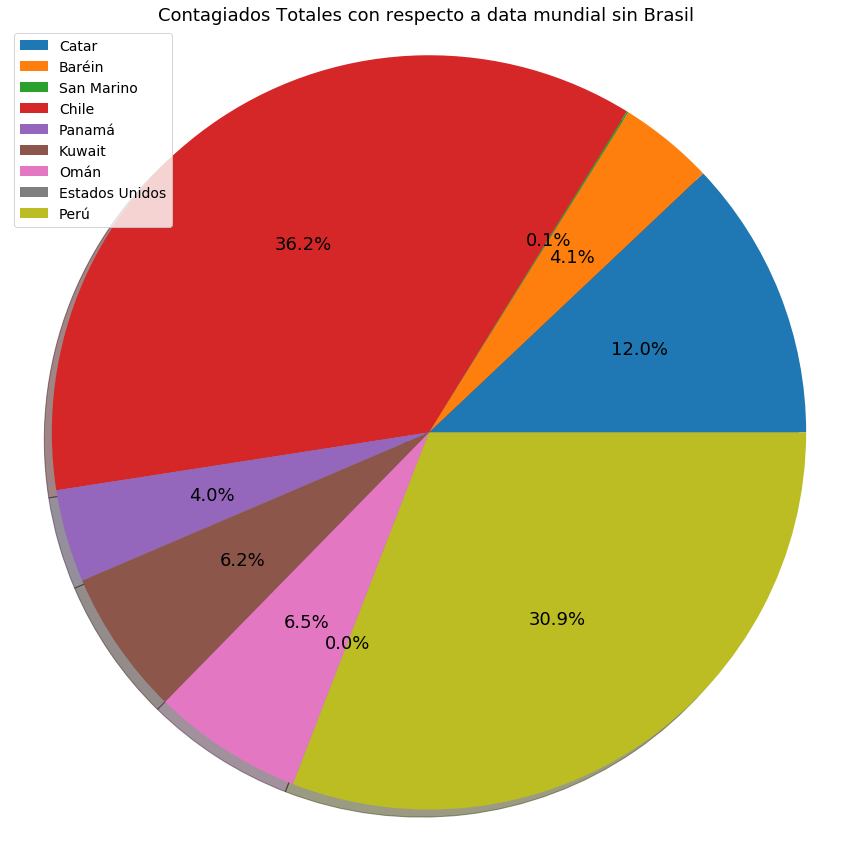

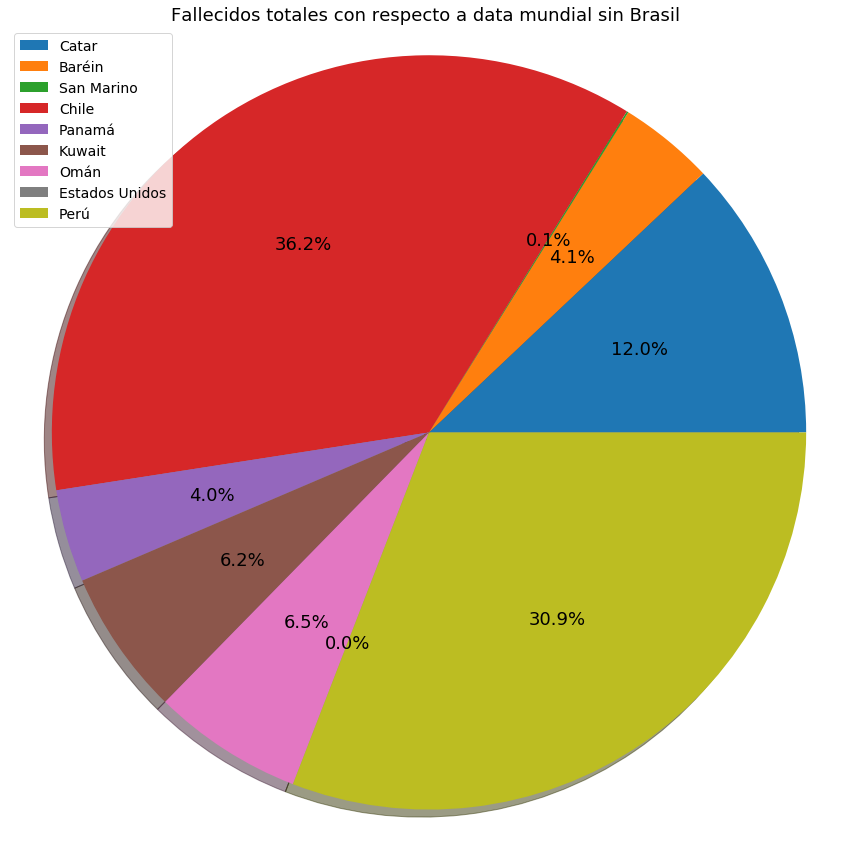

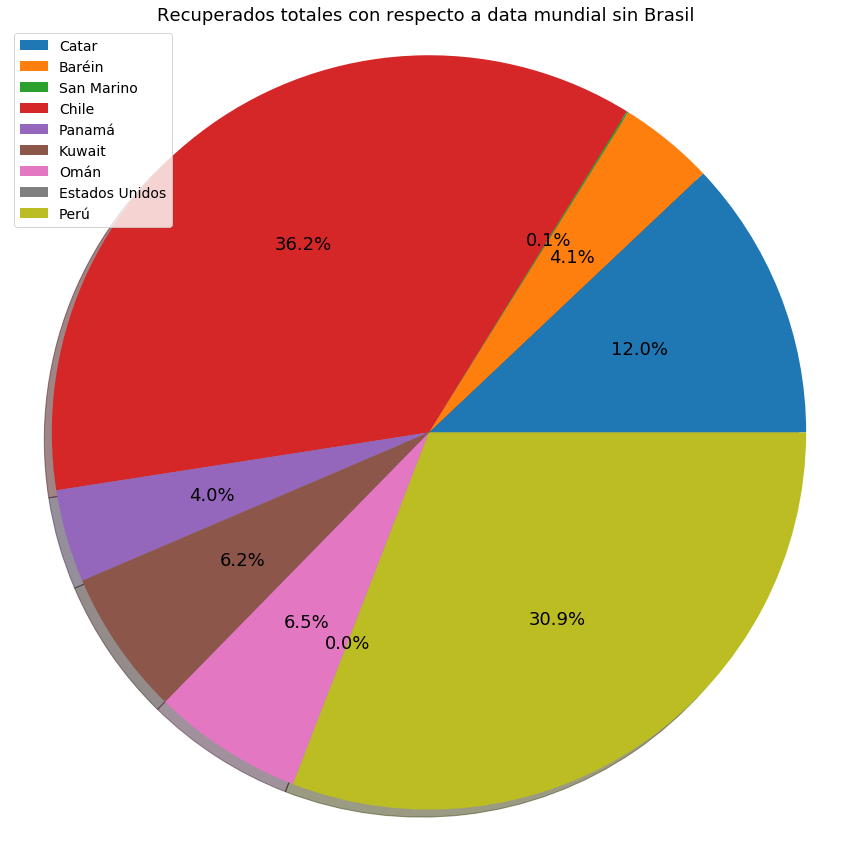

In [48]:
countries = ['Qatar', 'Bahrain', 'San Marino', 'Chile', 'Panama', 'Kuwait', 'Oman', 'USA', 'Peru']
spanishName = ['Catar', 'Baréin', 'San Marino', 'Chile', 'Panamá', 'Kuwait', 'Omán', 'Estados Unidos', 'Perú']
identificators = ['qatar', 'bahrain', 'san_marino', 'chile', 'panama', 'kuwait', 'oman', 'usa', 'peru']

# Pie charts ploting without Brazil
# - Contagiados vs Tiempo
# - Fallecidos vs Tiempo
# - Recuperados vs Tiempo
# - Subplots

labels = ['Contagiados Totales', 'Fallecidos totales', 'Recuperados totales']
identificators = ['cases_without_brazil', 'deaths_without_brazil', 'recovereds_without_brazil']
cases_sizes = []
deaths_sizes = []
recovered_sizes = []

for country in countries:
    element = ranking_cases[(ranking_cases['Country/Region'] == country) & (ranking_cases['Date'] == '07-27')]
    total_cases = element['Confirmed']
              
    cases_sizes.append(element['Confirmed'].sum())
    deaths_sizes.append(element['Deaths'].sum())
    recovered_sizes.append(element['Recovered'].sum())

count = 0
for ident in identificators:
    patches,ax = plt.subplots(figsize=(15,15))
    if(ident == 'cases'):
        sizes = cases_sizes
    elif(ident == 'deaths'):
        sizes = deaths_sizes
    else:
        sizes = recovered_sizes
    ax.pie(sizes, autopct='%.1f%%', shadow=True)
    ax.legend(spanishName, loc = 2)
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    ax.set_title(labels[count] + ' con respecto a data mundial sin Brasil')
    plt.savefig("pie_charts/" + ident + ".png")
    count = count + 1